# 📊 Data Gathering

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random


# Function to scrape per game stats for the 2023 season
def scrape_per_game_stats():
    url = f'https://www.basketball-reference.com/leagues/NBA_2023_per_game.html'
    print(f"Fetching per game stats from: {url}")
    res = requests.get(url)
    print(f"Status code for per game stats: {res.status_code}")
    
    if res.status_code != 200:
        print(f"Failed to retrieve per game stats for 2023")
        return None

    soup = BeautifulSoup(res.text, 'html.parser')
    table = soup.find('table', {'id': 'per_game_stats'})
    if not table:
        print(f"No per game table found for 2023")
        return None
    
    headers = [th.getText() for th in table.find('thead').find_all('th')][1:]  # Skip rank column
    rows = table.find('tbody').find_all('tr')
    
    player_stats = []
    for row in rows:
        stats = [td.getText() for td in row.find_all('td')]
        if stats:
            player_stats.append(stats)
    
    df = pd.DataFrame(player_stats, columns=headers)
    
    # Filter out rows for players with multiple teams, keeping only the combined 'TOT' row
    df = df[(df['Team'] == 'TOT') | (~df['Player'].duplicated(keep='first'))]
    df['Season'] = 2023  # Add Season column
    return df

# Function to scrape advanced stats for the 2023 season
def scrape_advanced_stats():
    url = f'https://www.basketball-reference.com/leagues/NBA_2023_advanced.html'
    print(f"Fetching advanced stats from: {url}")
    res = requests.get(url)
    print(f"Status code for advanced stats: {res.status_code}")
    
    if res.status_code != 200:
        print(f"Failed to retrieve advanced stats for 2023")
        return None

    soup = BeautifulSoup(res.text, 'html.parser')
    table = soup.find('table', {'id': 'advanced_stats'})
    if not table:
        print(f"No advanced stats table found for 2023")
        return None
    
    headers = [th.getText() for th in table.find('thead').find_all('th')][1:]  # Skip rank column
    rows = table.find('tbody').find_all('tr')
    
    player_stats = []
    for row in rows:
        stats = [td.getText() for td in row.find_all('td')]
        if stats:
            player_stats.append(stats)
    
    df = pd.DataFrame(player_stats, columns=headers)
    
    # Filter out rows for players with multiple teams, keeping only the combined 'TOT' row
    df = df[(df['Tm'] == 'TOT') | (~df['Player'].duplicated(keep='first'))]
    df['Season'] = 2023  # Add Season column
    return df

# Function to scrape MVP voting for the 2023 season
def scrape_mvp_voting():
    url = f'https://www.basketball-reference.com/awards/awards_2023.html'
    print(f"Fetching MVP voting stats from: {url}")
    res = requests.get(url)
    print(f"Status code for MVP voting: {res.status_code}")
    
    if res.status_code != 200:
        print(f"Failed to retrieve MVP voting for 2023")
        return None

    soup = BeautifulSoup(res.text, 'html.parser')
    table = soup.find('table', {'id': 'mvp'})
    if not table:
        print(f"No MVP voting table found for 2023")
        return None
    
    headers = [th.getText() for th in table.find_all('tr')[1].find_all('th')][1:]  # Skip rank column
    rows = table.find('tbody').find_all('tr')
    player_stats = []
    for row in rows:
        stats = [td.getText() for td in row.find_all('td')]
        if stats:
            player_stats.append(stats)
    
    df = pd.DataFrame(player_stats, columns=headers[:len(player_stats[0])])  # Match header length to data length
    df['Season'] = 2023  # Add Season column
    return df

# Main function to scrape and combine Per Game, Advanced Stats, and MVP Voting for 2023
def scrape_and_combine_2023(output_file='NBA_2023_combined_stats.csv'):
    print(f"Scraping data for the 2023 season...")
    
    # Scrape per game stats
    per_game_df = scrape_per_game_stats()
    time.sleep(random.uniform(10, 20))  # Random sleep between 10 to 20 seconds to avoid rate limit
    
    # Scrape advanced stats
    advanced_df = scrape_advanced_stats()
    time.sleep(random.uniform(10, 20))  # Random sleep between 10 to 20 seconds to avoid rate limit
    
    # Scrape MVP voting
    mvp_voting_df = scrape_mvp_voting()
    time.sleep(random.uniform(10, 20))  # Random sleep between 10 to 20 seconds to avoid rate limit
    
    # If all dataframes exist, merge them
    if per_game_df is not None and advanced_df is not None and mvp_voting_df is not None:
        combined_df = pd.merge(per_game_df, advanced_df, on=['Player', 'Season'], how='outer', suffixes=('_per_game', '_advanced'))
        combined_df = pd.merge(combined_df, mvp_voting_df, on=['Player', 'Season'], how='outer', suffixes=('', '_mvp'))
        
        # Save the combined DataFrame to a CSV file
        combined_df.to_csv(output_file, index=False)
        print(f"Data for 2023 combined and saved to {output_file}.")
    else:
        print("Some data for 2023 could not be scraped successfully.")

# Call the function to scrape and combine for 2023
scrape_and_combine_2023()


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Function to scrape per game stats for a given season
def scrape_per_game_stats(season):
    url = f'https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html'
    print(f"Fetching per game stats from: {url}")
    res = requests.get(url)
    print(f"Status code for per game stats: {res.status_code}")
    
    if res.status_code != 200:
        print(f"Failed to retrieve per game stats for {season}")
        return None

    soup = BeautifulSoup(res.text, 'html.parser')
    table = soup.find('table', {'id': 'per_game_stats'})
    if not table:
        print(f"No per game table found for {season}")
        return None
    
    headers = [th.getText() for th in table.find('thead').find_all('th')][1:]  # Skip rank column
    rows = table.find('tbody').find_all('tr')
    
    player_stats = []
    for row in rows:
        stats = [td.getText() for td in row.find_all('td')]
        if stats:
            player_stats.append(stats)
    
    df = pd.DataFrame(player_stats, columns=headers)
    
    # Filter out rows for players with multiple teams, keeping only the combined 'TOT' row
    df = df[(df['Team'] == 'TOT') | (~df['Player'].duplicated(keep='first'))]
    df['Season'] = season  # Add Season column
    return df

# Function to scrape advanced stats for a given season
def scrape_advanced_stats(season):
    url = f'https://www.basketball-reference.com/leagues/NBA_{season}_advanced.html'
    print(f"Fetching advanced stats from: {url}")
    res = requests.get(url)
    print(f"Status code for advanced stats: {res.status_code}")
    
    if res.status_code != 200:
        print(f"Failed to retrieve advanced stats for {season}")
        return None

    soup = BeautifulSoup(res.text, 'html.parser')
    table = soup.find('table', {'id': 'advanced_stats'})
    if not table:
        print(f"No advanced stats table found for {season}")
        return None
    
    headers = [th.getText() for th in table.find('thead').find_all('th')][1:]  # Skip rank column
    rows = table.find('tbody').find_all('tr')
    
    player_stats = []
    for row in rows:
        stats = [td.getText() for td in row.find_all('td')]
        if stats:
            player_stats.append(stats)
    
    df = pd.DataFrame(player_stats, columns=headers)
    
    # Filter out rows for players with multiple teams, keeping only the combined 'TOT' row
    df = df[(df['Tm'] == 'TOT') | (~df['Player'].duplicated(keep='first'))]
    df['Season'] = season  # Add Season column
    return df

# Function to scrape MVP voting for a given season
def scrape_mvp_voting(season):
    url = f'https://www.basketball-reference.com/awards/awards_{season}.html'
    print(f"Fetching MVP voting stats from: {url}")
    res = requests.get(url)
    print(f"Status code for MVP voting: {res.status_code}")
    
    if res.status_code != 200:
        print(f"Failed to retrieve MVP voting for {season}")
        return None

    soup = BeautifulSoup(res.text, 'html.parser')
    table = soup.find('table', {'id': 'mvp'})
    if not table:
        print(f"No MVP voting table found for {season}")
        return None
    
    headers = [th.getText() for th in table.find_all('tr')[1].find_all('th')][1:]  # Skip rank column
    rows = table.find('tbody').find_all('tr')
    player_stats = []
    for row in rows:
        stats = [td.getText() for td in row.find_all('td')]
        if stats:
            player_stats.append(stats)
    
    df = pd.DataFrame(player_stats, columns=headers[:len(player_stats[0])])  # Match header length to data length
    df['Season'] = season  # Add Season column
    return df

# Main function to scrape and combine Per Game, Advanced Stats, and MVP Voting for multiple seasons
def scrape_and_combine_all_seasons(start_season=2004, end_season=2024, output_file='NBA_all_seasons_combined_stats.csv'):
    all_data = []  # List to store data for all seasons
    
    for season in range(start_season, end_season + 1):
        print(f"\nScraping data for the {season} season...")
        
        # Scrape per game stats
        per_game_df = scrape_per_game_stats(season)
        time.sleep(random.uniform(10, 20))  # Random sleep to avoid rate limit
        
        # Scrape advanced stats
        advanced_df = scrape_advanced_stats(season)
        time.sleep(random.uniform(10, 20))  # Random sleep to avoid rate limit
        
        # Scrape MVP voting
        mvp_voting_df = scrape_mvp_voting(season)
        time.sleep(random.uniform(10, 20))  # Random sleep to avoid rate limit
        
        # If all dataframes exist, merge them
        if per_game_df is not None and advanced_df is not None and mvp_voting_df is not None:
            combined_df = pd.merge(per_game_df, advanced_df, on=['Player', 'Season'], how='outer', suffixes=('_per_game', '_advanced'))
            combined_df = pd.merge(combined_df, mvp_voting_df, on=['Player', 'Season'], how='outer', suffixes=('', '_mvp'))
            all_data.append(combined_df)  # Add season data to the list
        else:
            print(f"Some data for the {season} season could not be scraped successfully.")
    
    # Combine all seasons into a single DataFrame
    final_combined_df = pd.concat(all_data, ignore_index=True)
    
    # Save the combined DataFrame to a CSV file
    final_combined_df.to_csv(output_file, index=False)
    print(f"\nAll seasons combined and saved to {output_file}.")

# Call the function to scrape from 2004 to 2024 and save to one CSV
scrape_and_combine_all_seasons(2004, 2024)


Correlation with Vote Share:
 Vote Share    1.000000
VORP          0.654393
PER           0.637667
BPM           0.637567
WS/48         0.619234
WS            0.602259
OBPM          0.583283
OWS           0.531689
PTS           0.398637
FG            0.382249
DBPM          0.361685
USG%          0.358938
TOV           0.337445
TS%           0.334244
FTA           0.332713
FT            0.328182
2P%           0.297444
eFG%          0.296826
DWS           0.272837
FGA           0.263353
2P            0.263271
AST%          0.254896
AST           0.216971
DRB           0.214147
FG%           0.208661
DRB%          0.178390
TRB           0.168148
FTr           0.164841
MP            0.162094
GS            0.161058
3P            0.152785
3PA           0.152048
2PA           0.150237
TRB%          0.147602
G             0.145978
STL           0.144792
STL%          0.122406
MPG           0.103331
3P%           0.097918
3PAr          0.097665
TOV%          0.090128
BLK%          0.058774
BLK 

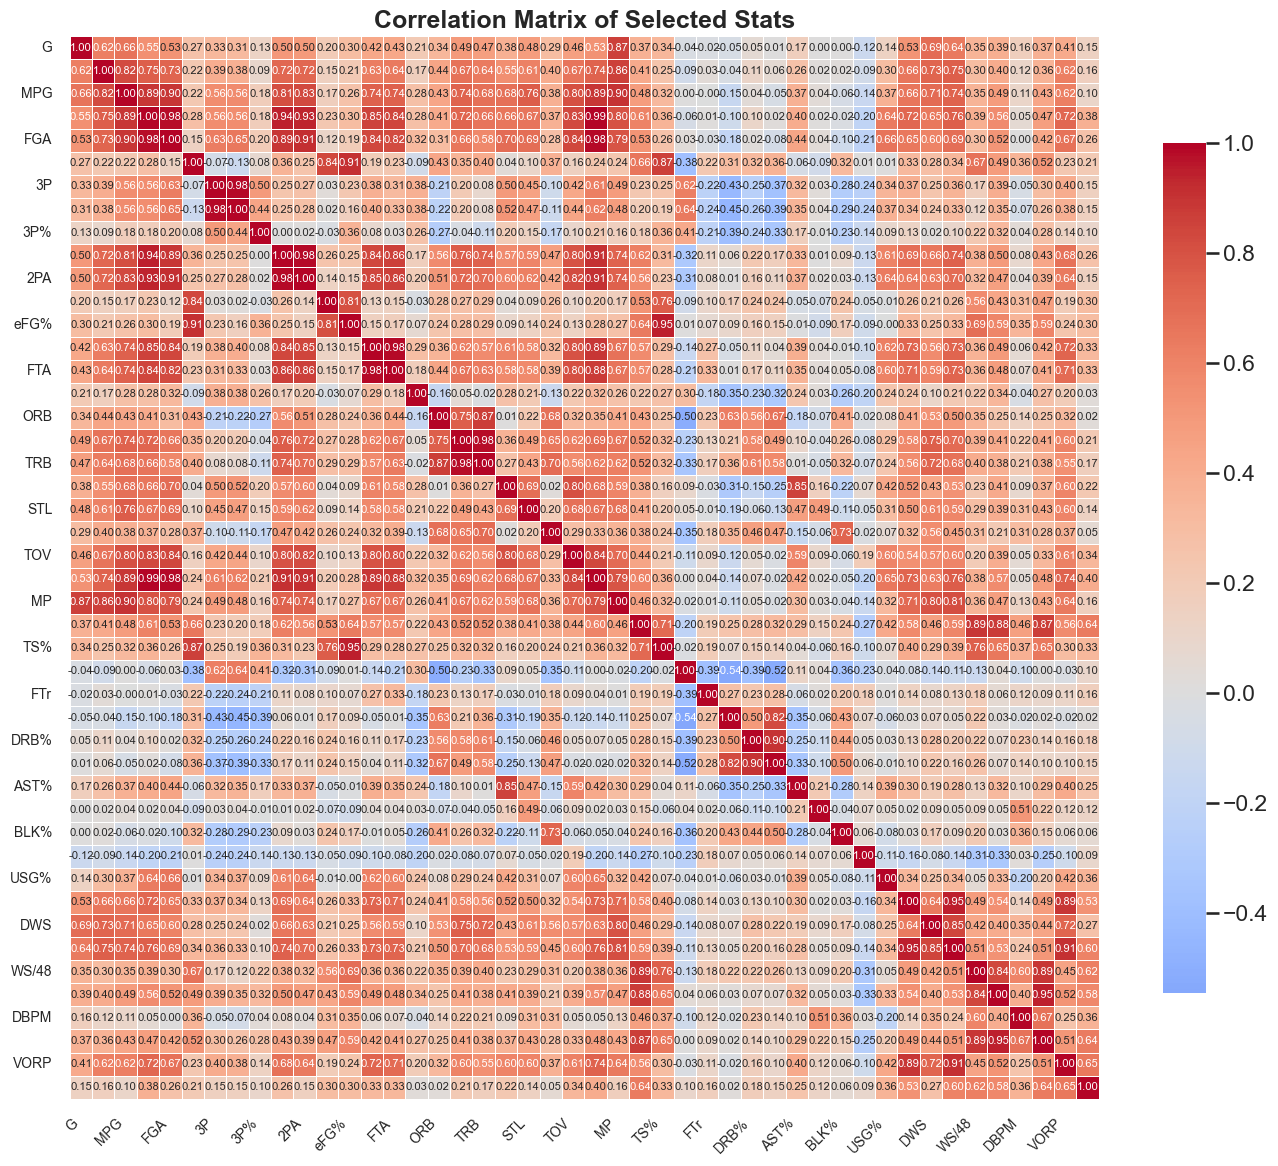

C:\Users\antho\AppData\Local\Temp\ipykernel_37416\1966069532.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


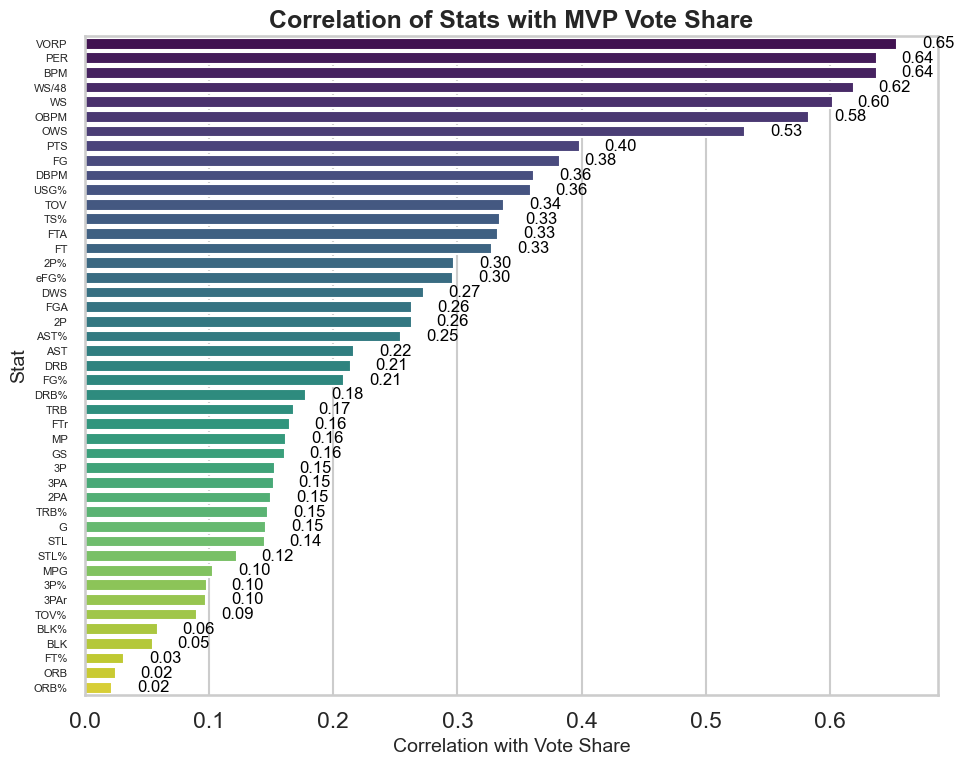

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a modern, clean theme with context appropriate for presentations
sns.set_theme(style="whitegrid", context="talk")

# Load the dataset
df = pd.read_csv("../NBA_all_seasons_combined_cleaned_stats.csv")

# Drop non-numeric and specified irrelevant columns
excluded_columns = ['Player', 'Pts Max', 'Pts Won', 'First Place Votes', 'Age', 'PF', 'Season']
numeric_df = df.drop(columns=excluded_columns, errors='ignore').select_dtypes(include=['float64', 'int64'])

# Add 'Vote Share' back for correlation analysis
numeric_df['Vote Share'] = df['Vote Share']

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display correlations with 'Vote Share' sorted by strength
vote_share_correlation = correlation_matrix['Vote Share'].sort_values(ascending=False)
print("Correlation with Vote Share:\n", vote_share_correlation)

# --- Heatmap Plot ---
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}  # Reduce annotation font size
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation Matrix of Selected Stats", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

# --- Bar Chart Plot ---
# Prepare the data for the bar chart (drop self-correlation)
df_corr = vote_share_correlation.drop('Vote Share').reset_index()
df_corr.columns = ['Stat', 'Correlation']

plt.figure(figsize=(10, 8))
barplot = sns.barplot(
    data=df_corr, 
    x="Correlation", 
    y="Stat", 
    palette="viridis", 
    orient='h'
)
plt.title("Correlation of Stats with MVP Vote Share", fontsize=18, weight='bold')
plt.xlabel("Correlation with Vote Share", fontsize=14)
plt.ylabel("Stat", fontsize=14)
plt.yticks(fontsize=8)


# Add annotations inside the bars for clarity
for i, (corr, stat) in enumerate(zip(df_corr['Correlation'], df_corr['Stat'])):
    # Adjust the text position based on the sign of the correlation
    xpos = corr - 0.05 if corr < 0 else corr + 0.02
    plt.text(xpos, i, f"{corr:.2f}", color='black', va="center", fontsize=12)

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv("../NBA_all_seasons_combined_cleaned_stats.csv")

# Remove rows where 'Vote Share' is NaN
df = df.dropna(subset=['Vote Share'])

# Set the target variable and features using the original data
X = df[['VORP', 'PER', 'BPM', 'WS/48', 'WS', 'OBPM', 'PTS', 'USG%']]
y = df['Vote Share']

# Standardize all features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, max_depth=None, max_features='sqrt', min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Check feature importances to see the influence of the weighted features
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)

Mean Squared Error (MSE): 0.044990999540350886
R² Score: 0.43101522446832263

Feature Importances:
 PER      0.217693
BPM      0.194515
VORP     0.143704
WS       0.125211
WS/48    0.101428
OBPM     0.094082
USG%     0.064014
PTS      0.059353
dtype: float64


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv("../NBA_all_seasons_combined_cleaned_stats.csv")

# Apply the filters: remove players with under 15 PPG and under 25 MPG
filtered_df = df[(df['PTS'] >= 15) & (df['MPG'] >= 25) & (df['G'] >= 50)]

# Save the filtered dataset to a new CSV
filtered_df.to_csv("NBA_filtered_above_15pts_25mpg.csv", index=False)

# Separate data for training and prediction
train_df = filtered_df.dropna(subset=['Vote Share'])  # Only players with actual 'Vote Share' for training
predict_df = filtered_df.copy()  # Full dataset for making predictions, including NaNs in 'Vote Share'

# Set features and target for training
X_train = train_df[['VORP', 'PER', 'BPM', 'WS/48', 'WS', 'OBPM', 'PTS', 'USG%']]
y_train = train_df['Vote Share']

# Initialize and train the Random Forest Regressor with best parameters
model = RandomForestRegressor(n_estimators=100, max_depth=None, max_features='sqrt', min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

# Prepare features for prediction on the full dataset
X_predict = predict_df[['VORP', 'PER', 'BPM', 'WS/48', 'WS', 'OBPM', 'PTS', 'USG%']]


# Make predictions for all players
predict_df['Predicted Vote Share'] = model.predict(X_predict)

# Group by Season and find top 5 players based on predicted and actual Vote Share
top_5_comparison = {}

for season in predict_df['Season'].unique():
    season_df = predict_df[predict_df['Season'] == season]
    
    # Sort by actual and predicted Vote Share, get top 5
    top_5_actual = season_df.nlargest(5, 'Vote Share')[['Player', 'Vote Share']].dropna()
    top_5_predicted = season_df.nlargest(5, 'Predicted Vote Share')[['Player', 'Predicted Vote Share']]
    
    # Store results in dictionary for comparison
    top_5_comparison[season] = {
        'Actual Top 5': top_5_actual,
        'Predicted Top 5': top_5_predicted
    }

# Display results
for season, comparison in sorted(top_5_comparison.items()):
    print(f"\nSeason: {season}")
    print("Actual Top 5 MVP Candidates:")
    print(comparison['Actual Top 5'])
    print("\nPredicted Top 5 MVP Candidates:")
    print(comparison['Predicted Top 5'])



Season: 2004
Actual Top 5 MVP Candidates:
              Player  Vote Share
2      Kevin Garnett       0.991
37        Tim Duncan       0.582
54   Jermaine O'Neal       0.425
79  Peja StojakoviÄ       0.228
88       Kobe Bryant       0.172

Predicted Top 5 MVP Candidates:
               Player  Predicted Vote Share
2       Kevin Garnett               0.78967
37         Tim Duncan               0.51336
54    Jermaine O'Neal               0.25242
79   Peja StojakoviÄ               0.17995
326    Cuttino Mobley               0.16657

Season: 2005
Actual Top 5 MVP Candidates:
              Player  Vote Share
19        Steve Nash       0.839
20  Shaquille O'Neal       0.813
72     Dirk Nowitzki       0.275
76        Tim Duncan       0.258
86     Allen Iverson       0.189

Predicted Top 5 MVP Candidates:
               Player  Predicted Vote Share
19         Steve Nash               0.61626
20   Shaquille O'Neal               0.54130
748  Chauncey Billups               0.26708
72      Dirk

C:\Users\antho\AppData\Local\Temp\ipykernel_37416\1485752717.py:52: UserWarning: Glyph 135 (\x87) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.93])


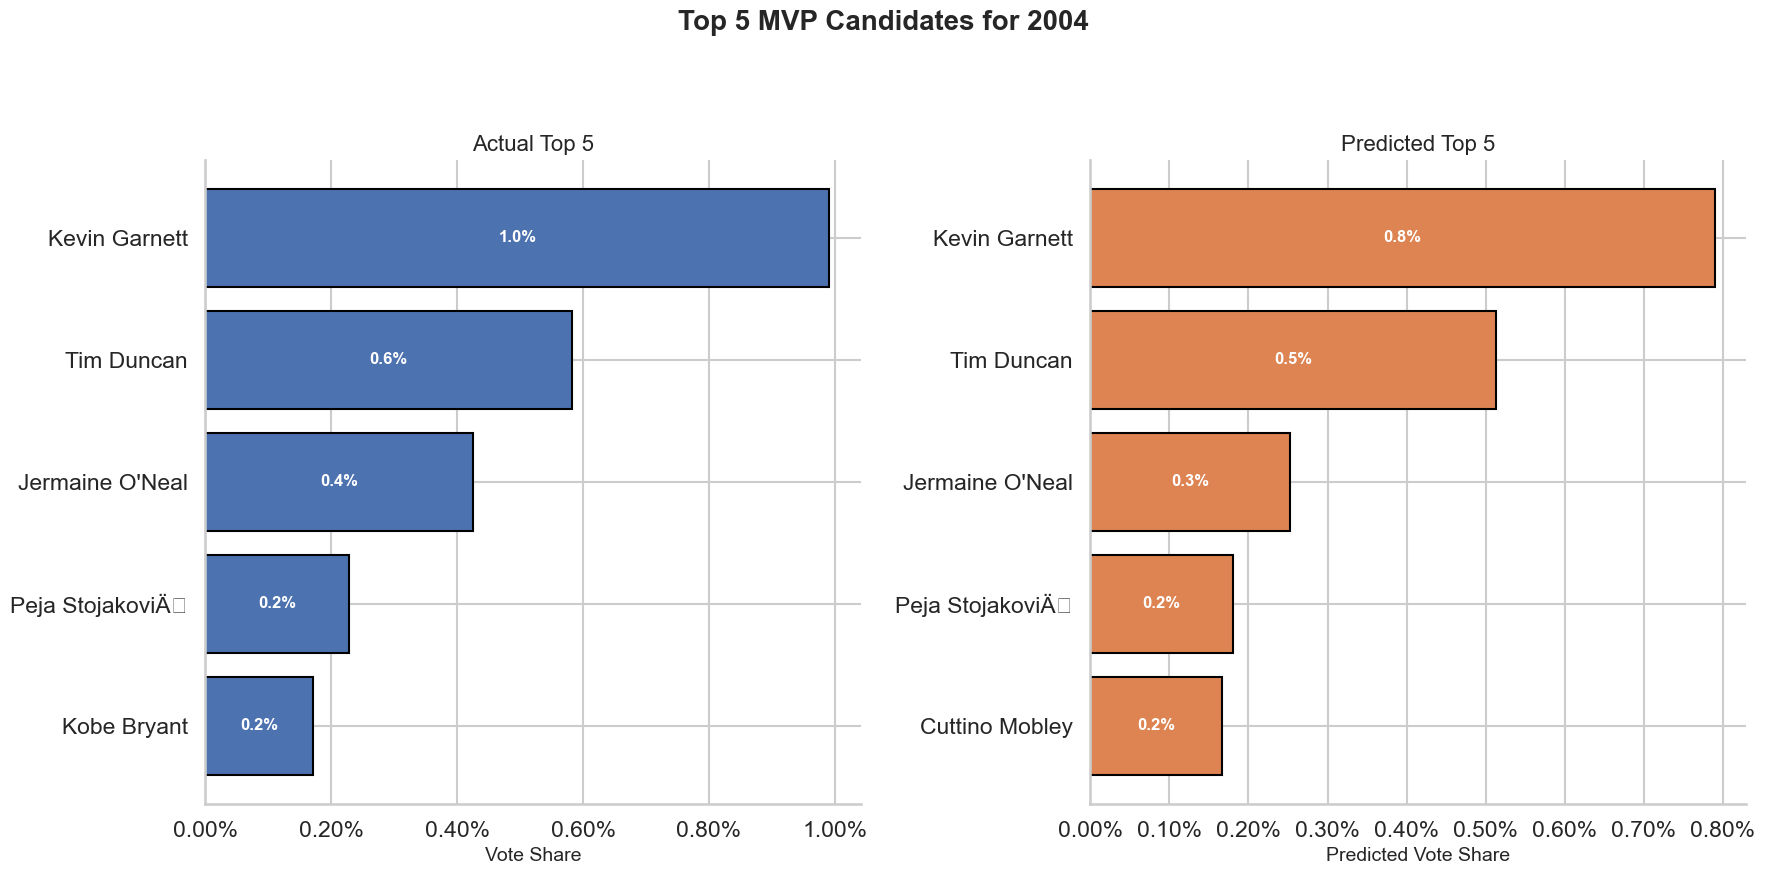

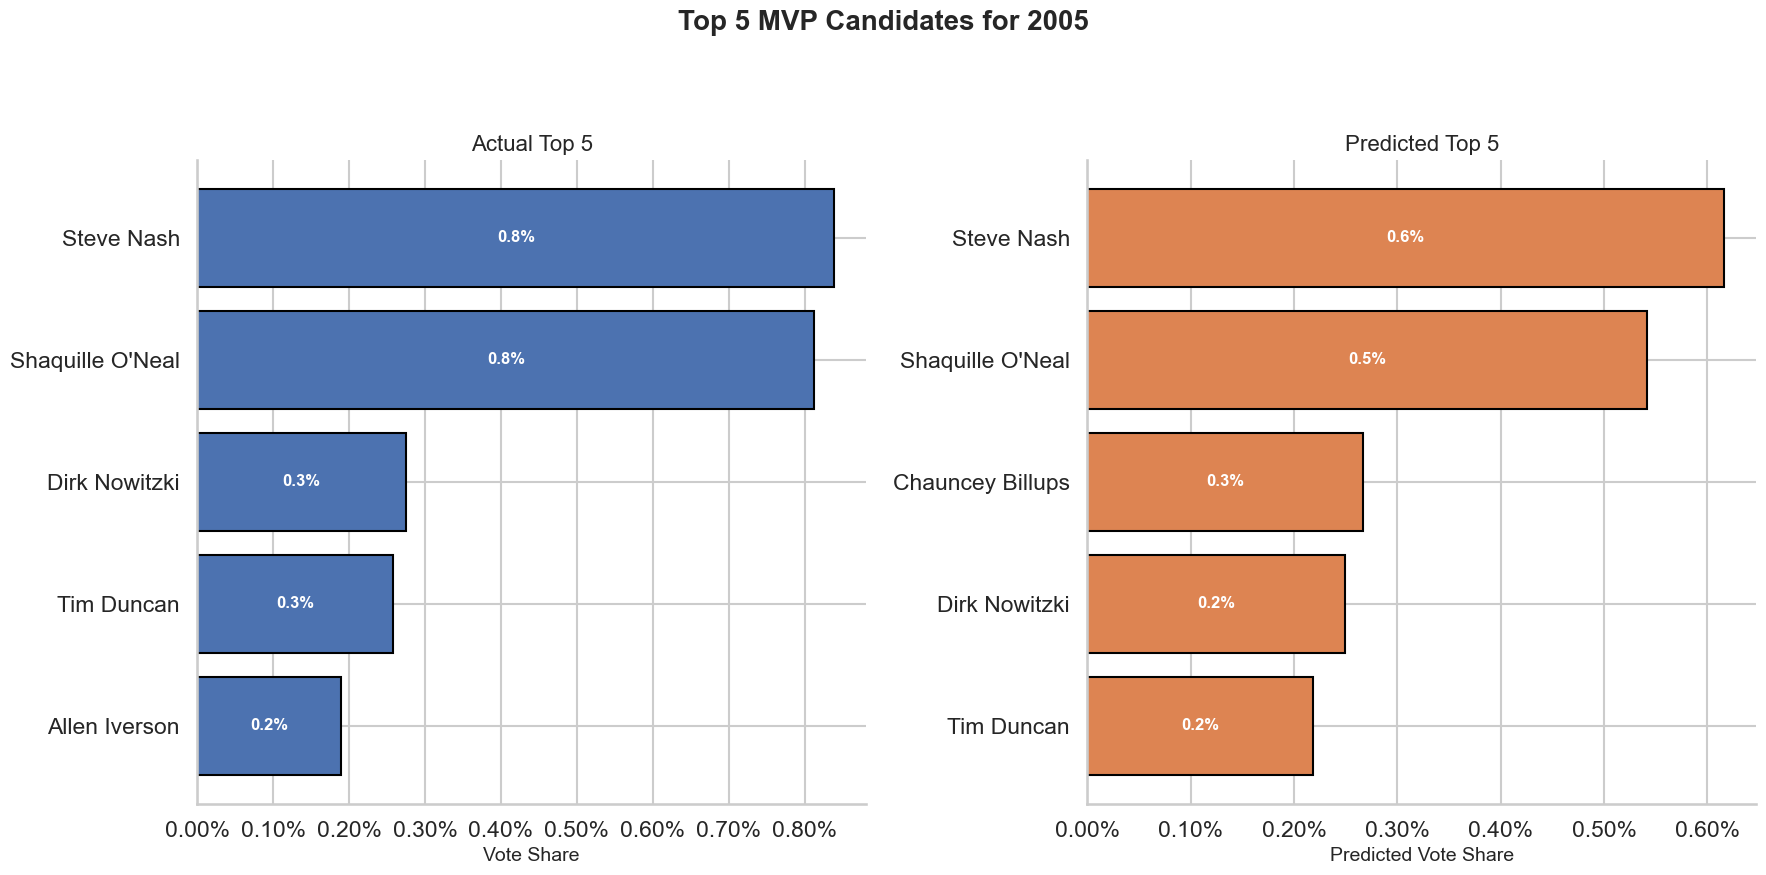

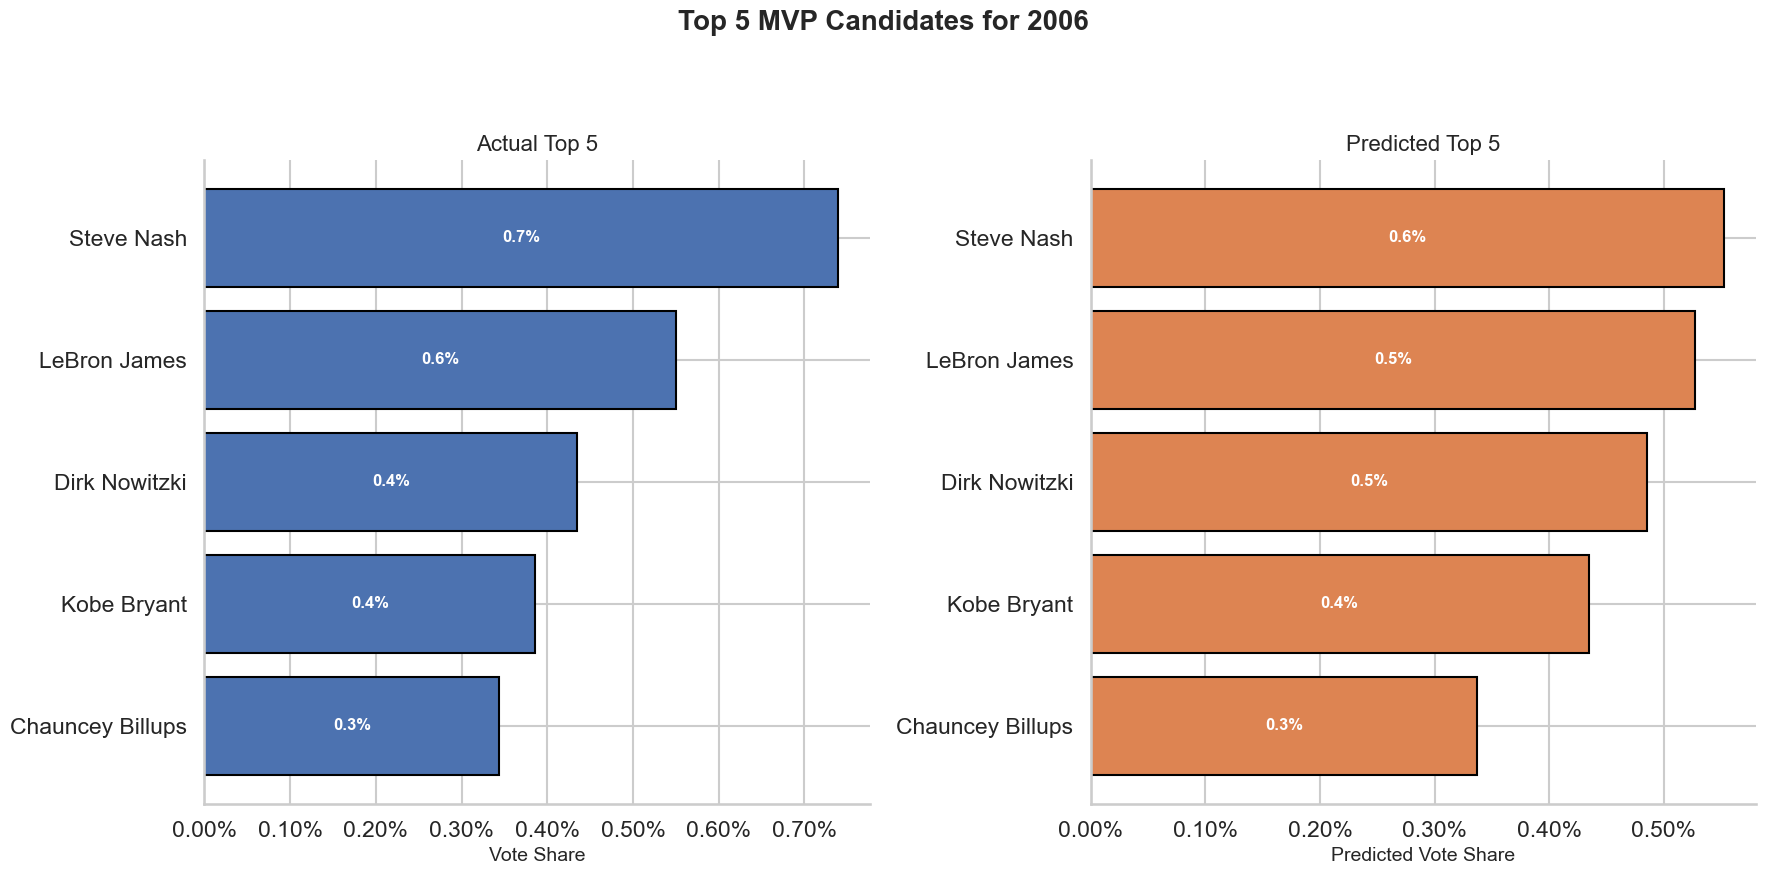

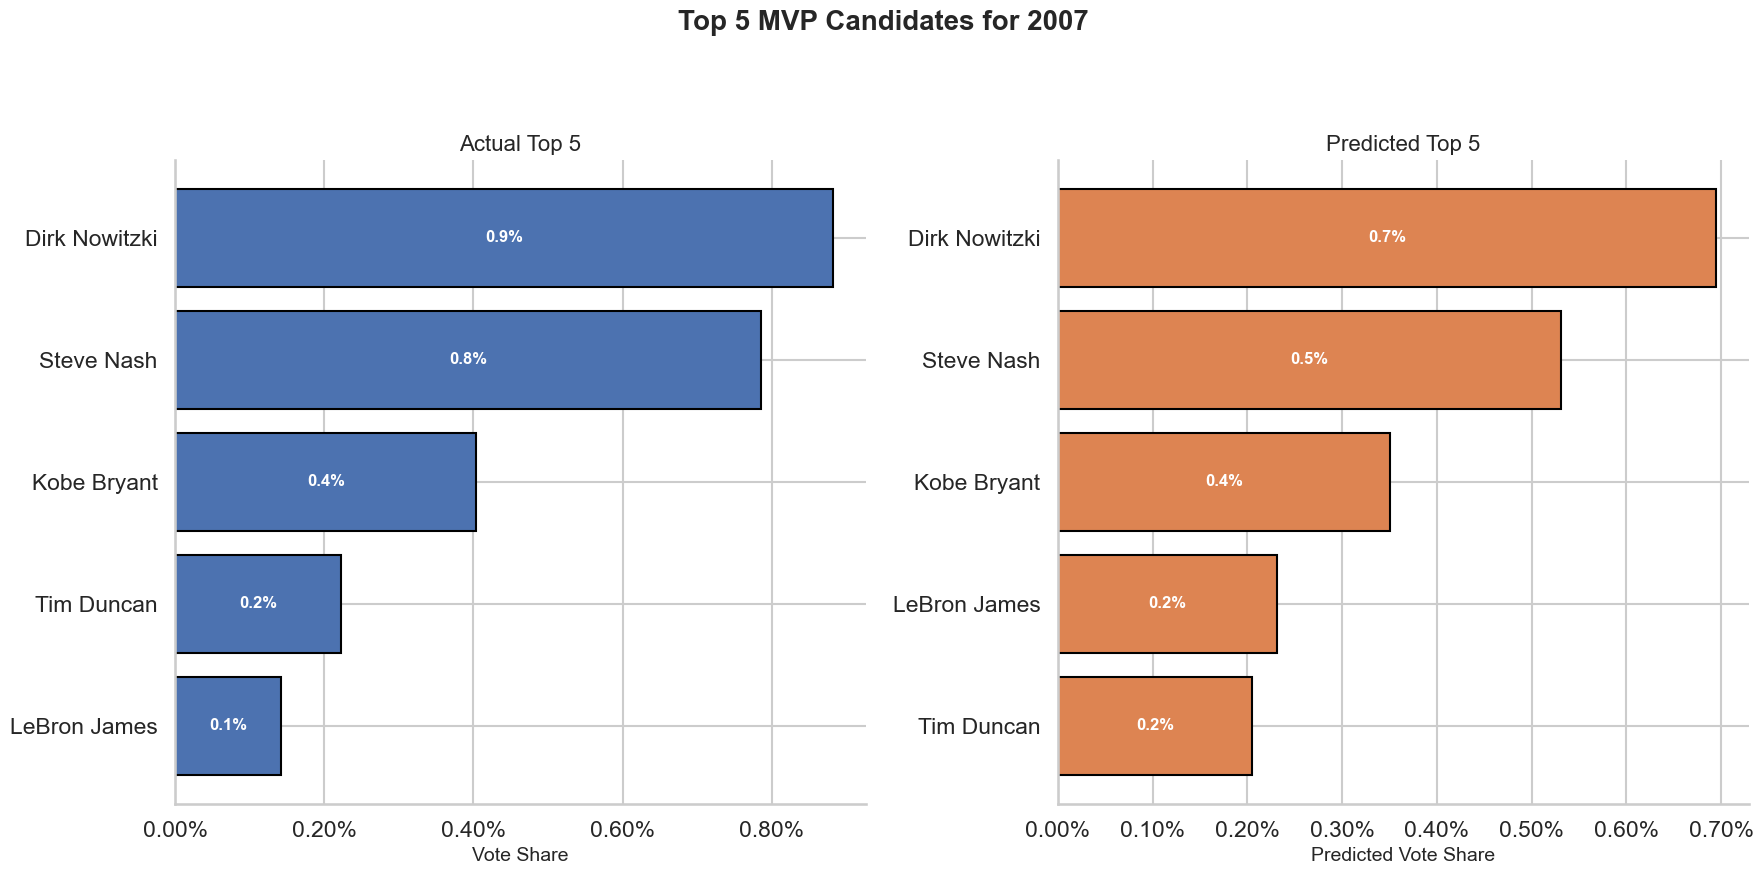

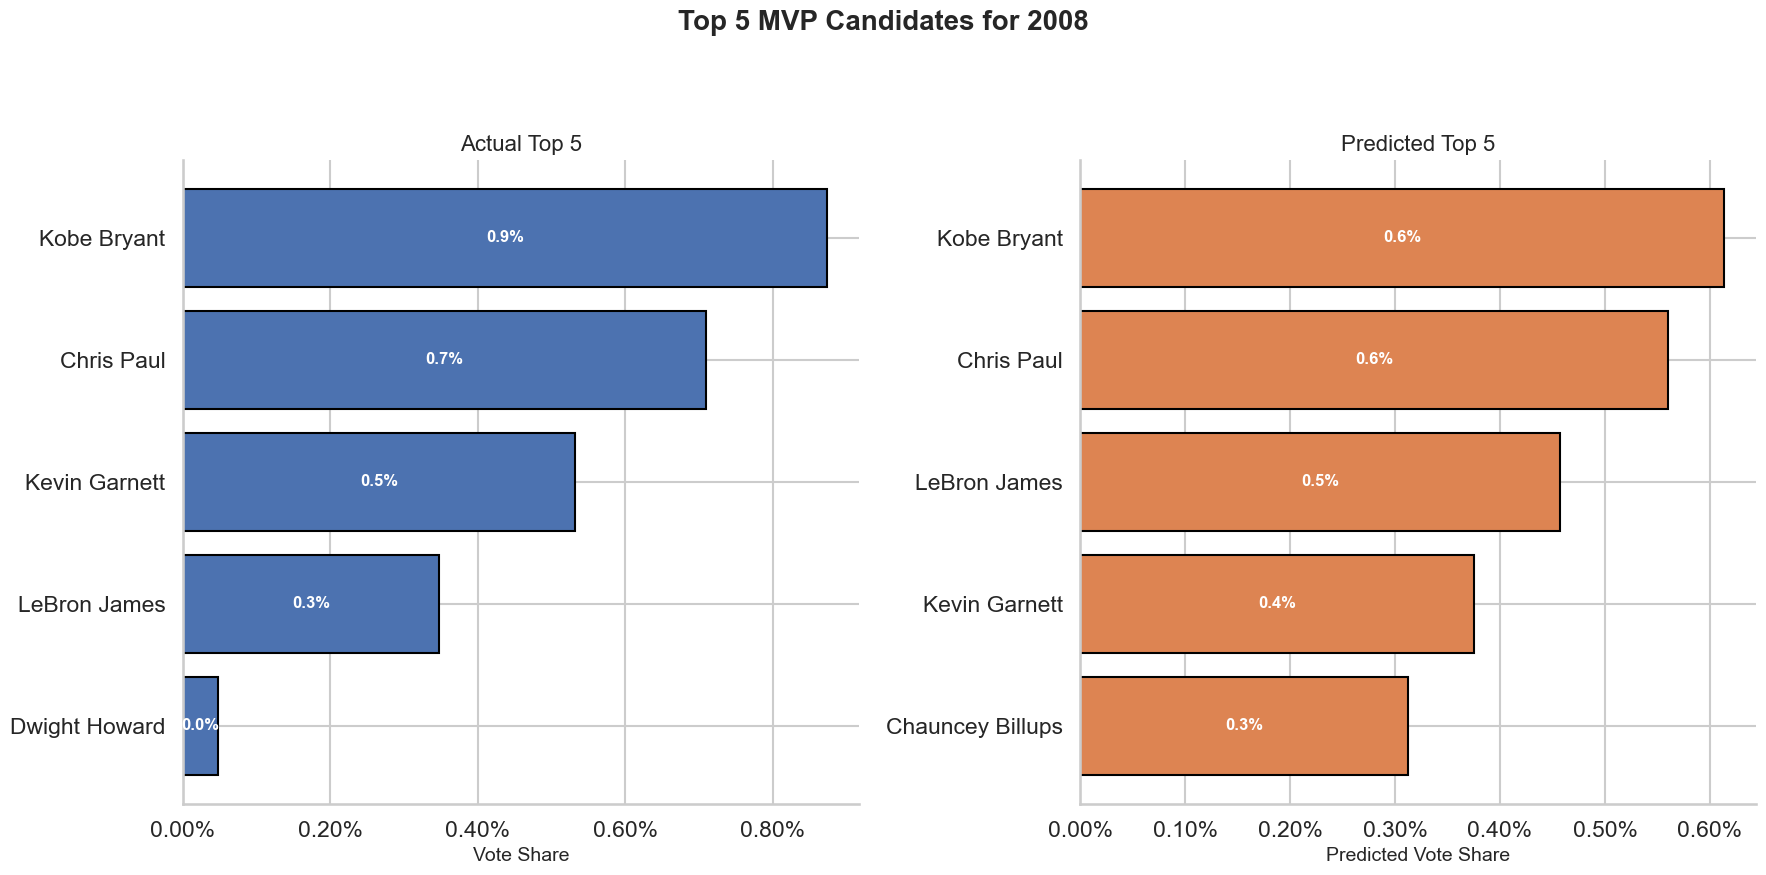

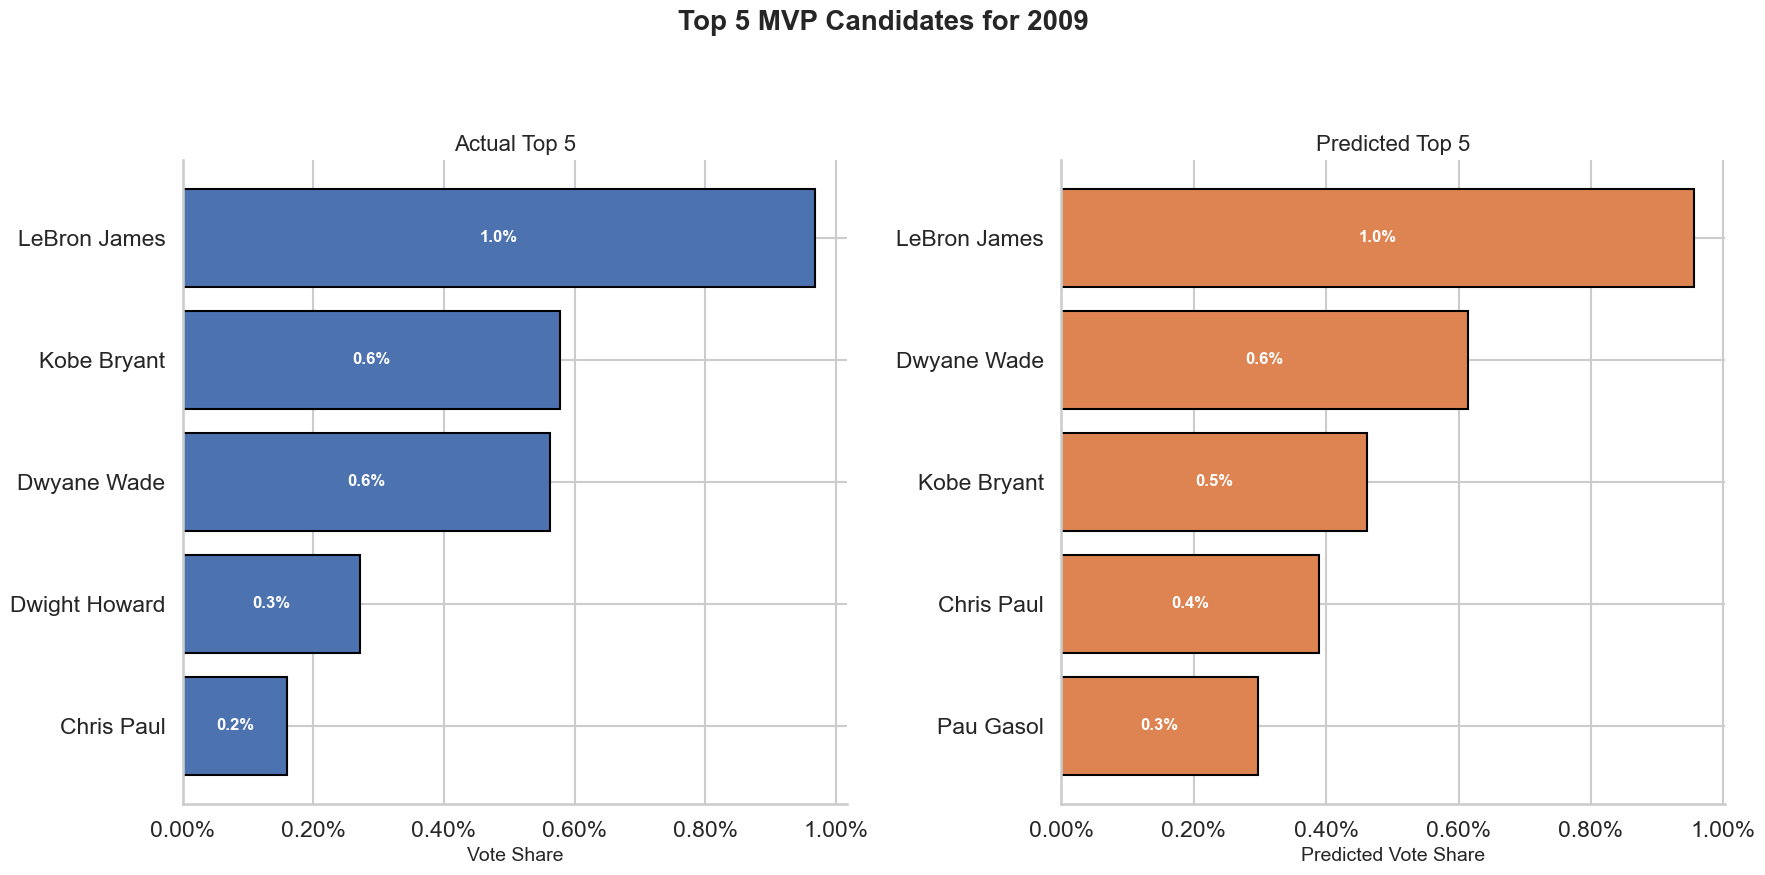

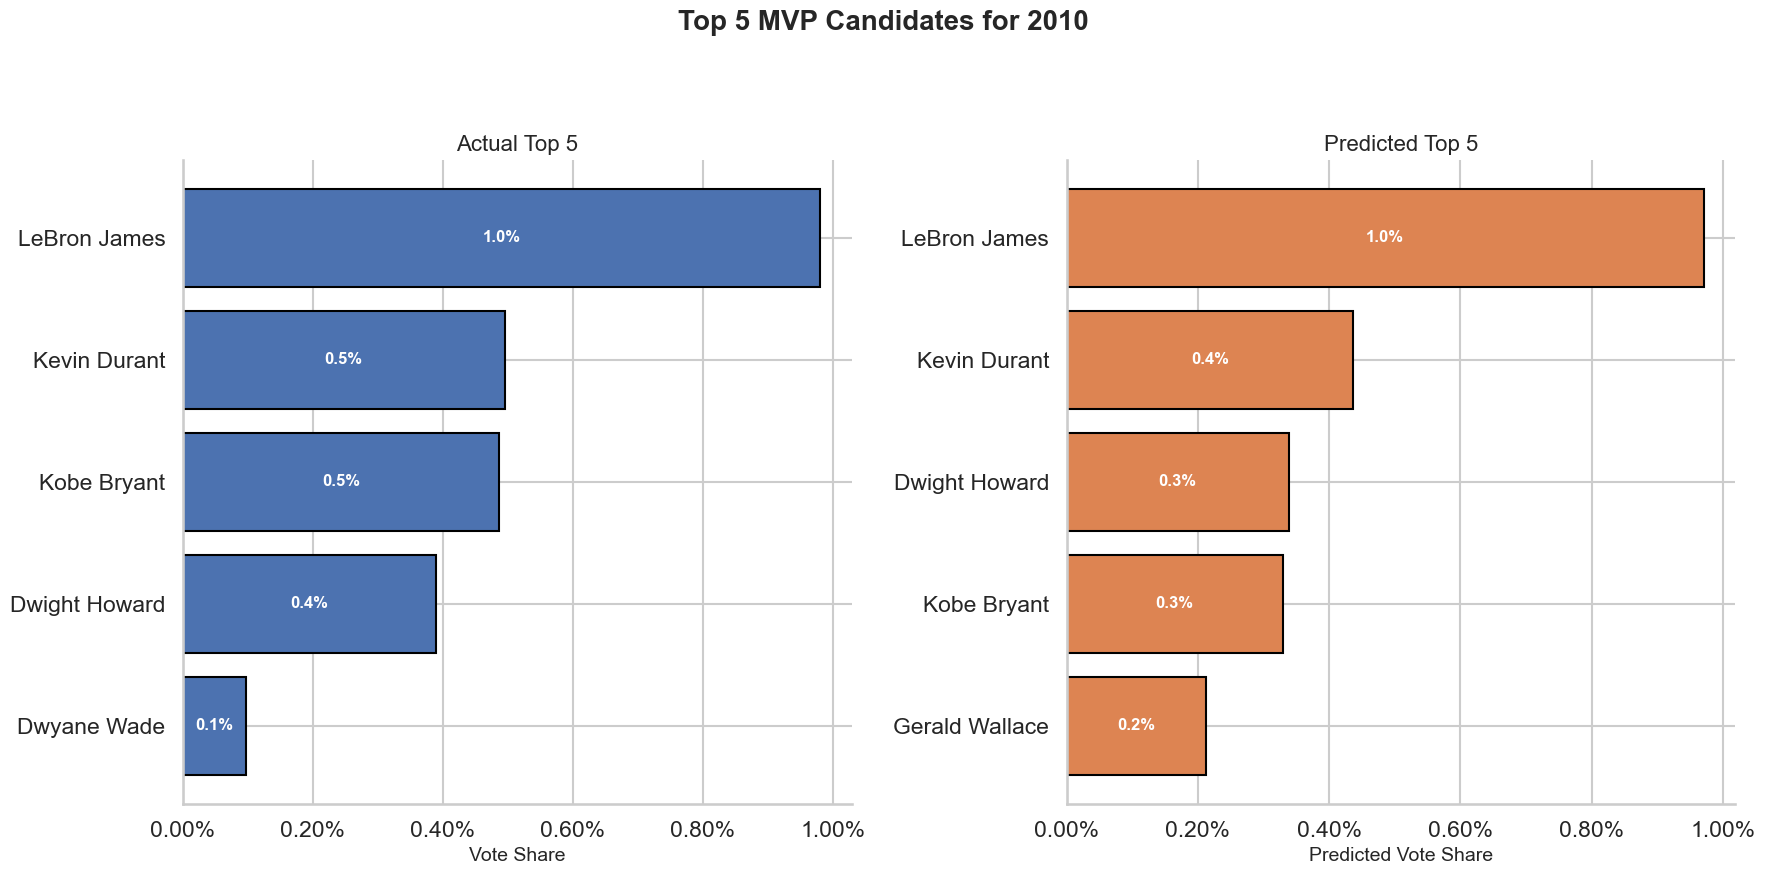

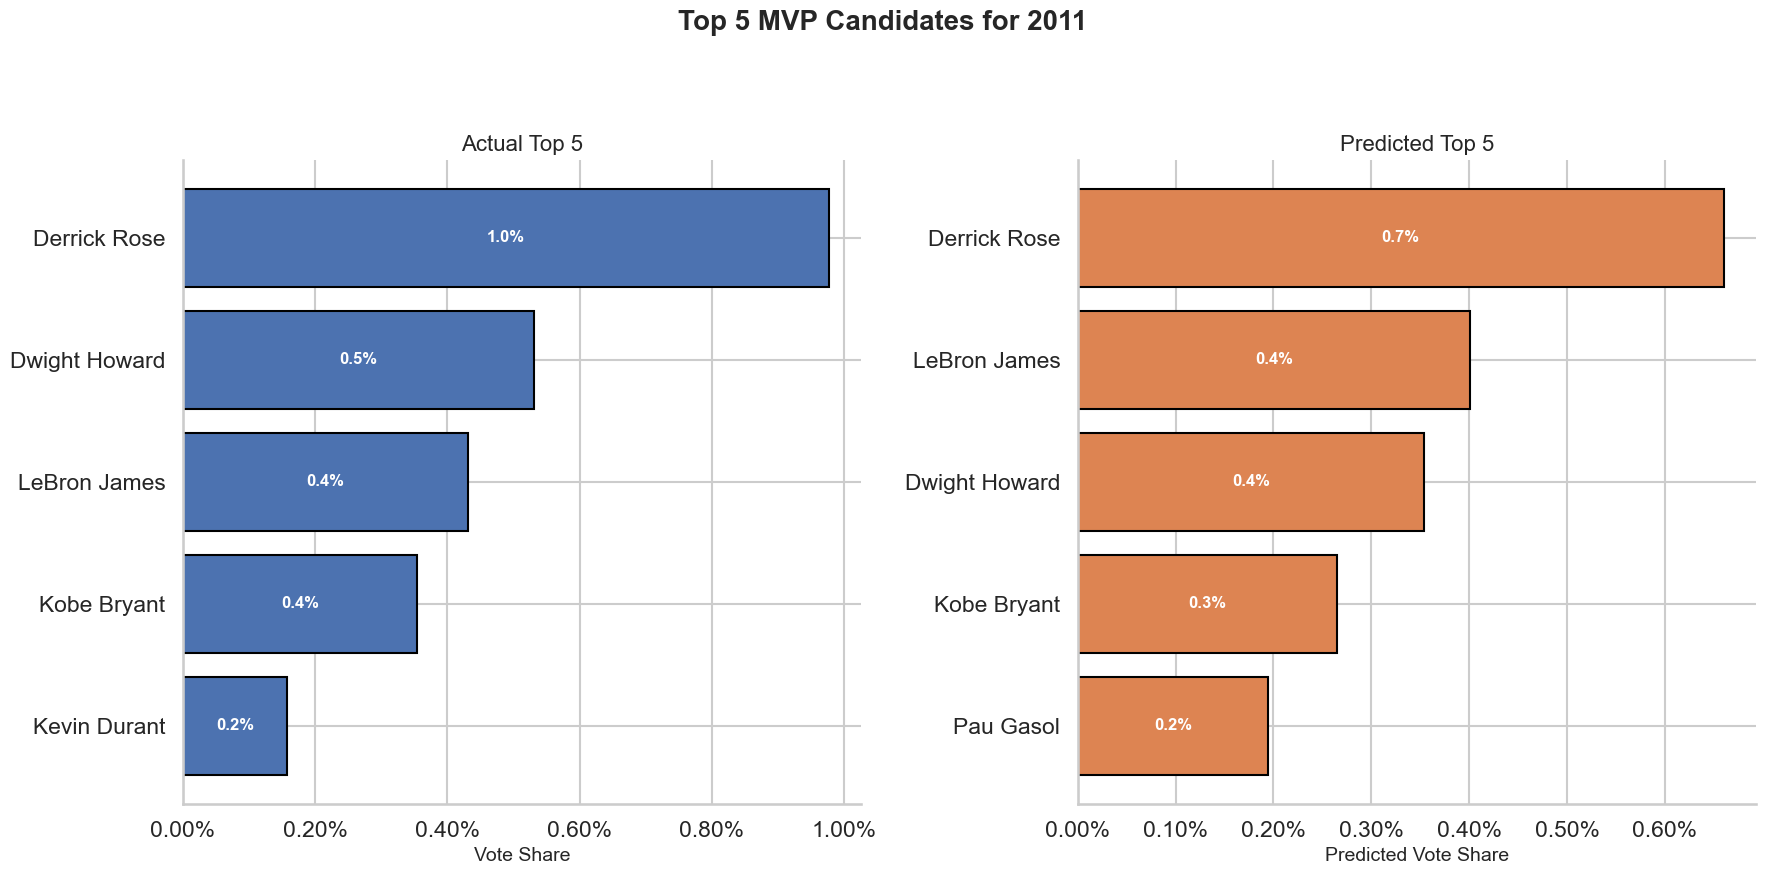

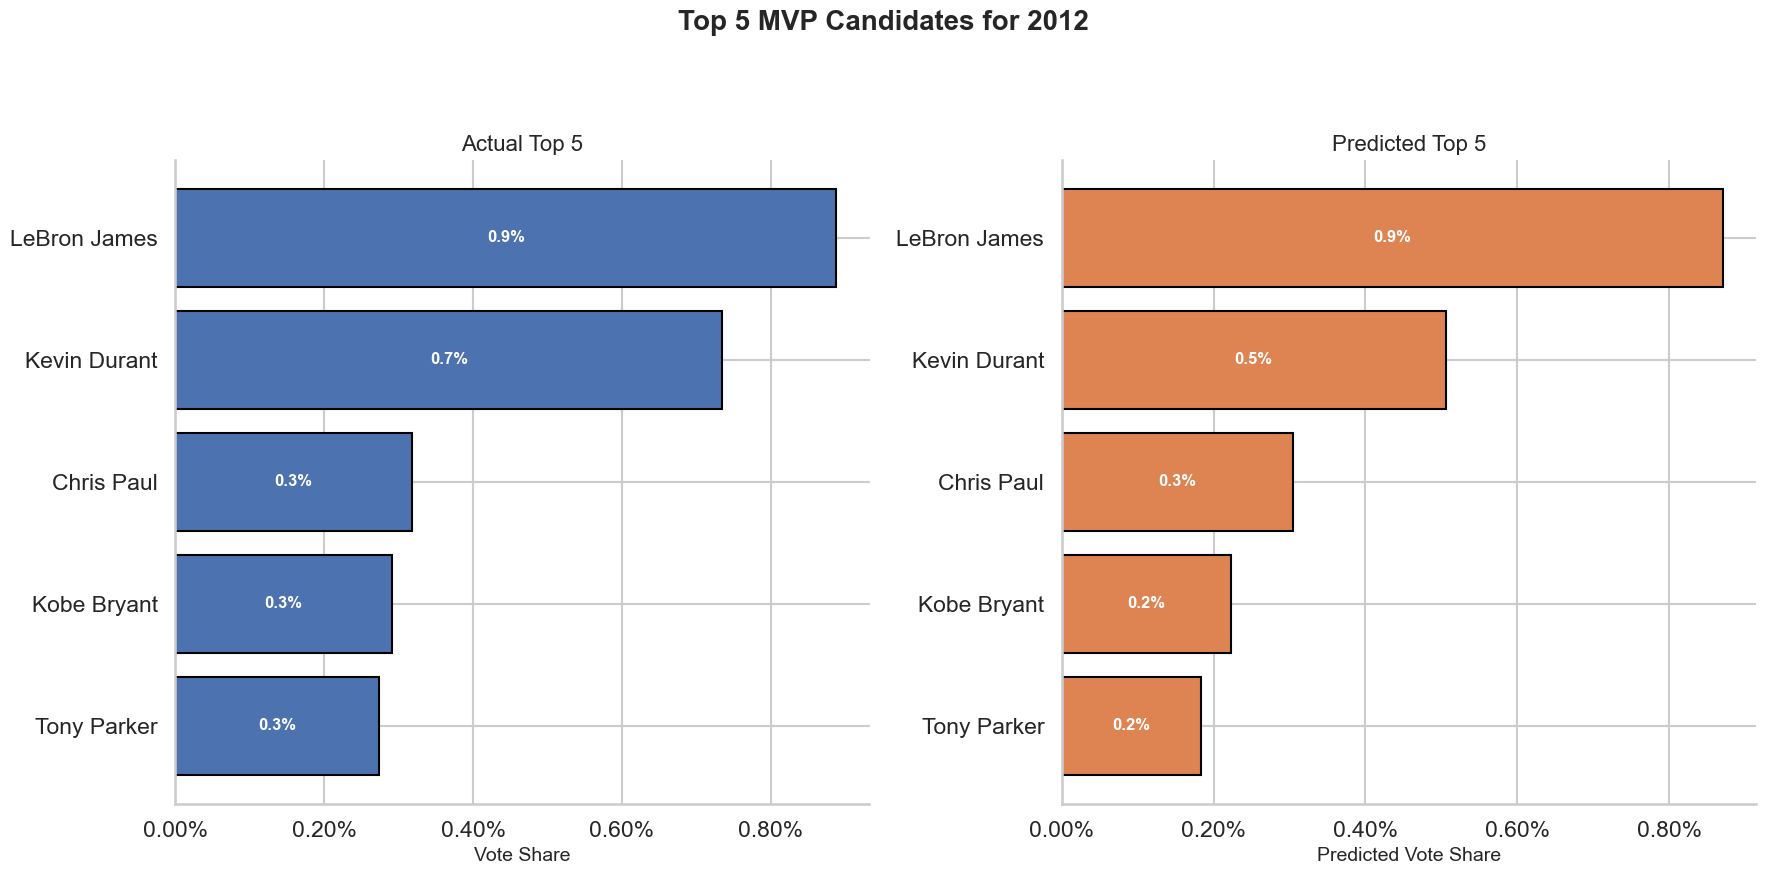

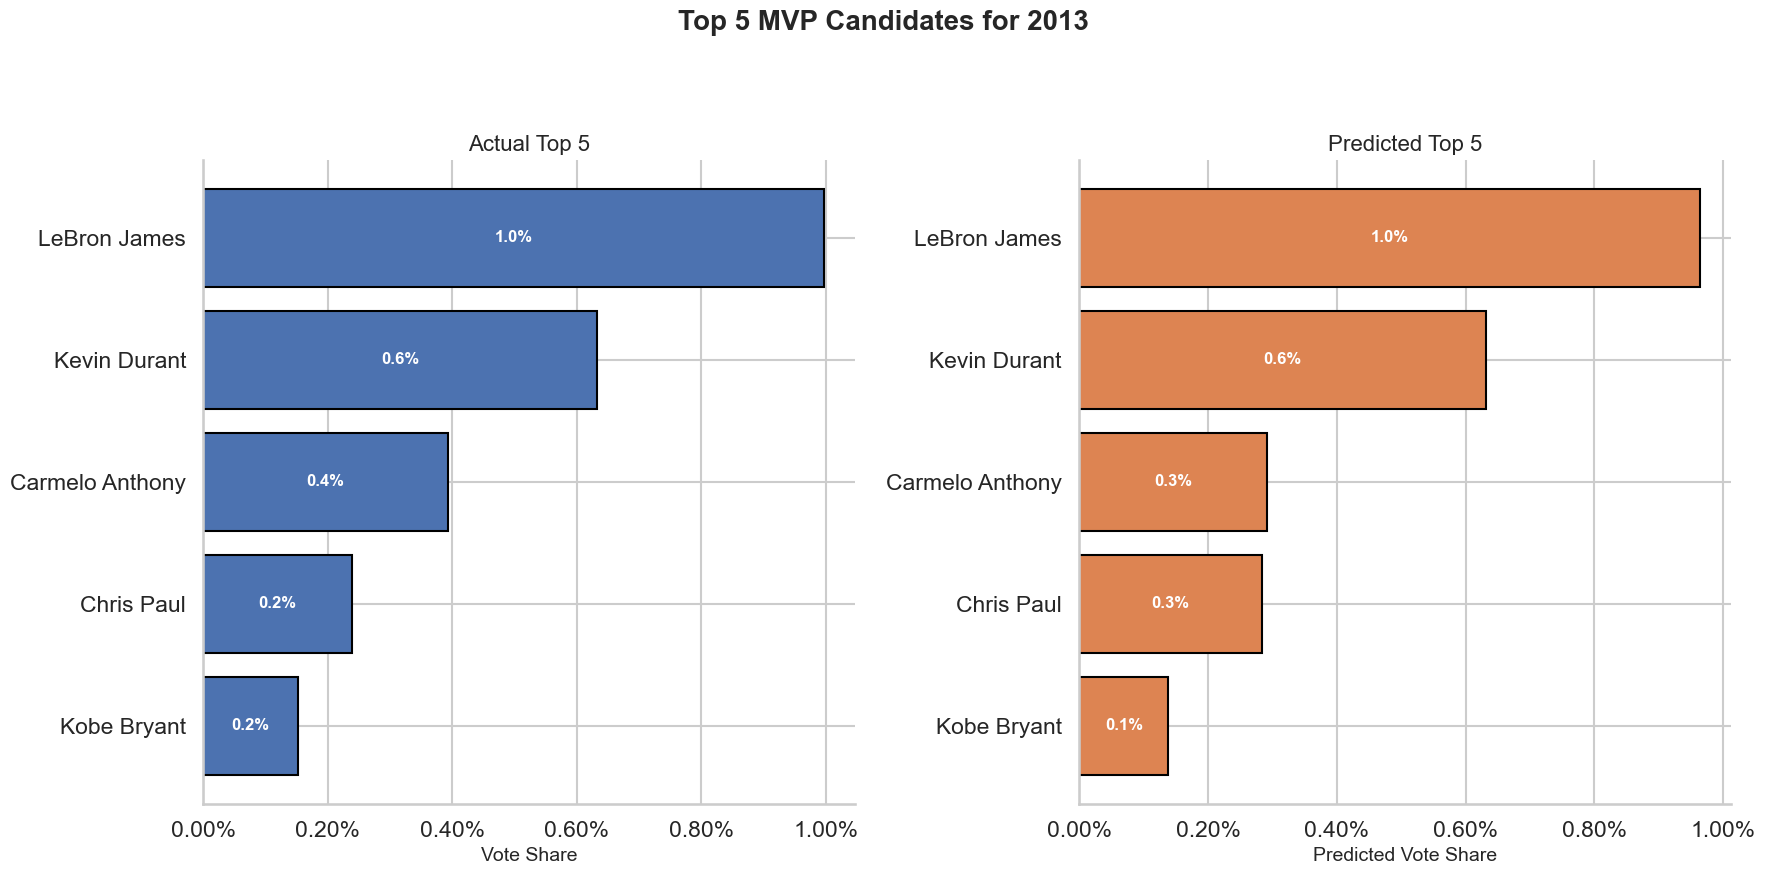

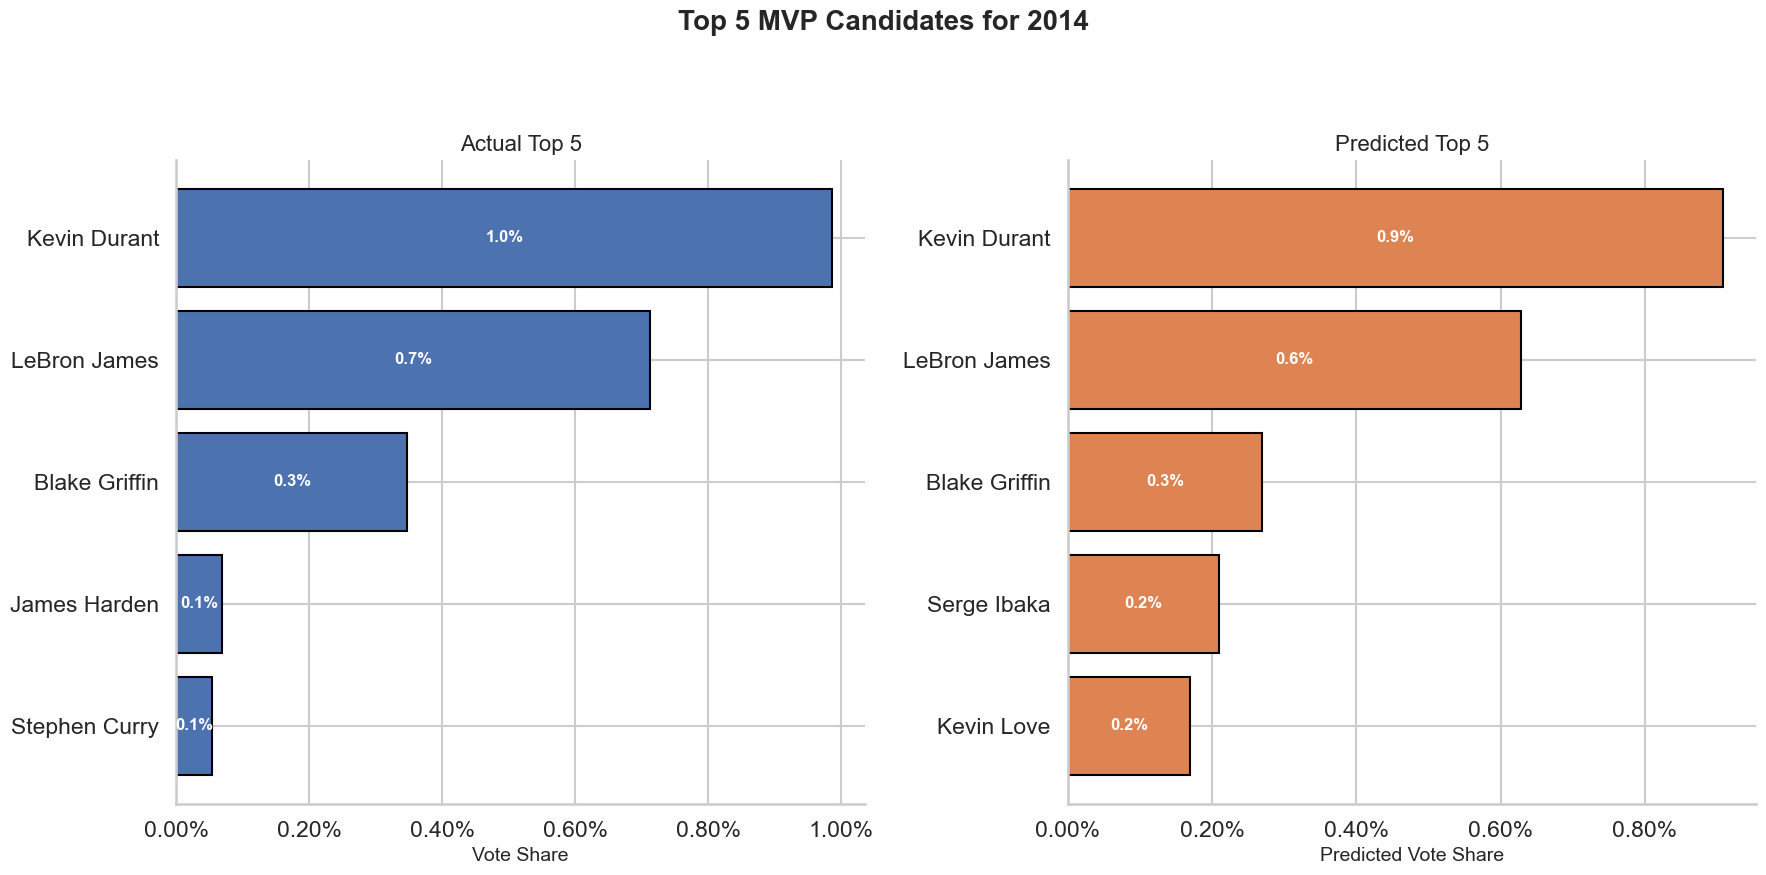

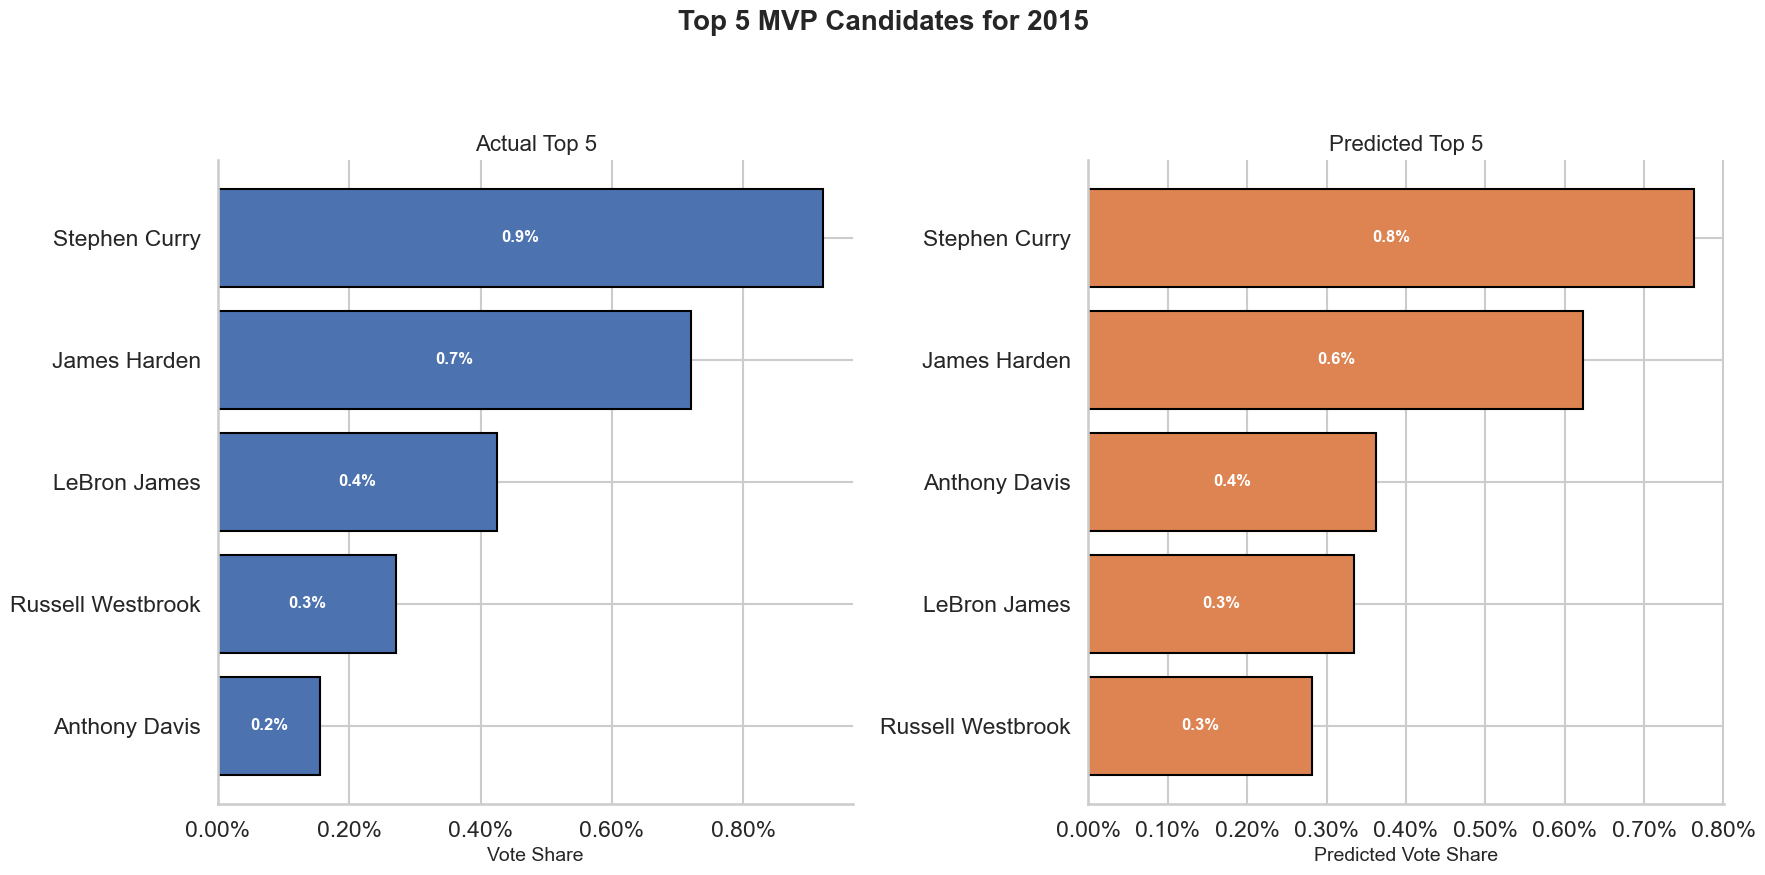

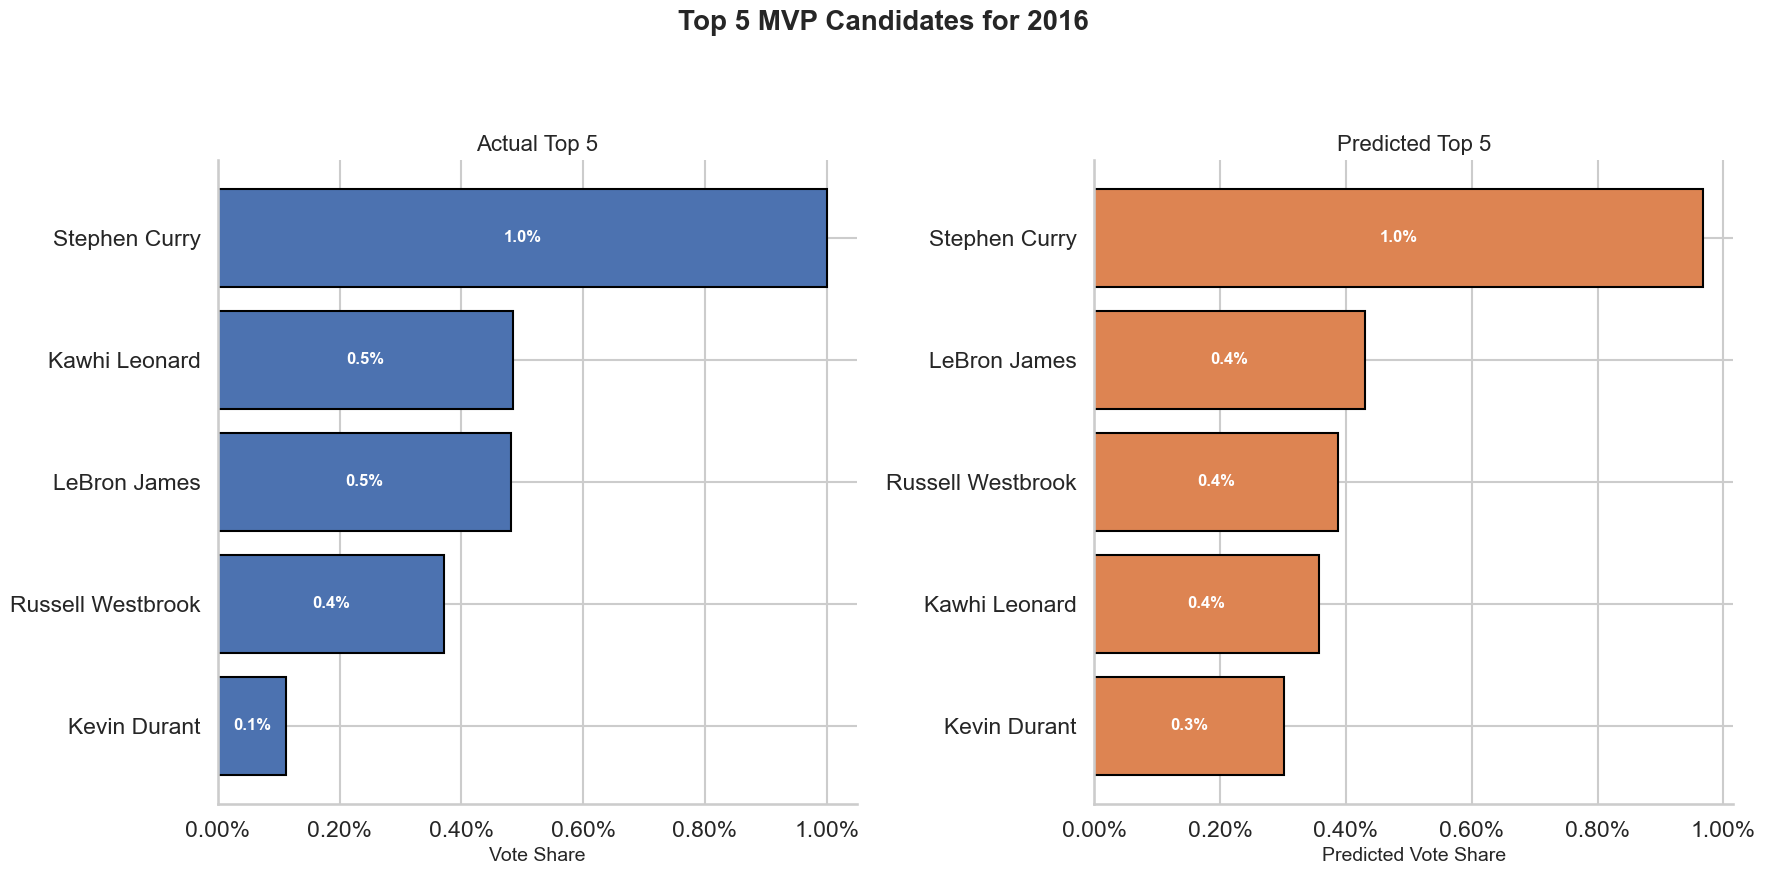

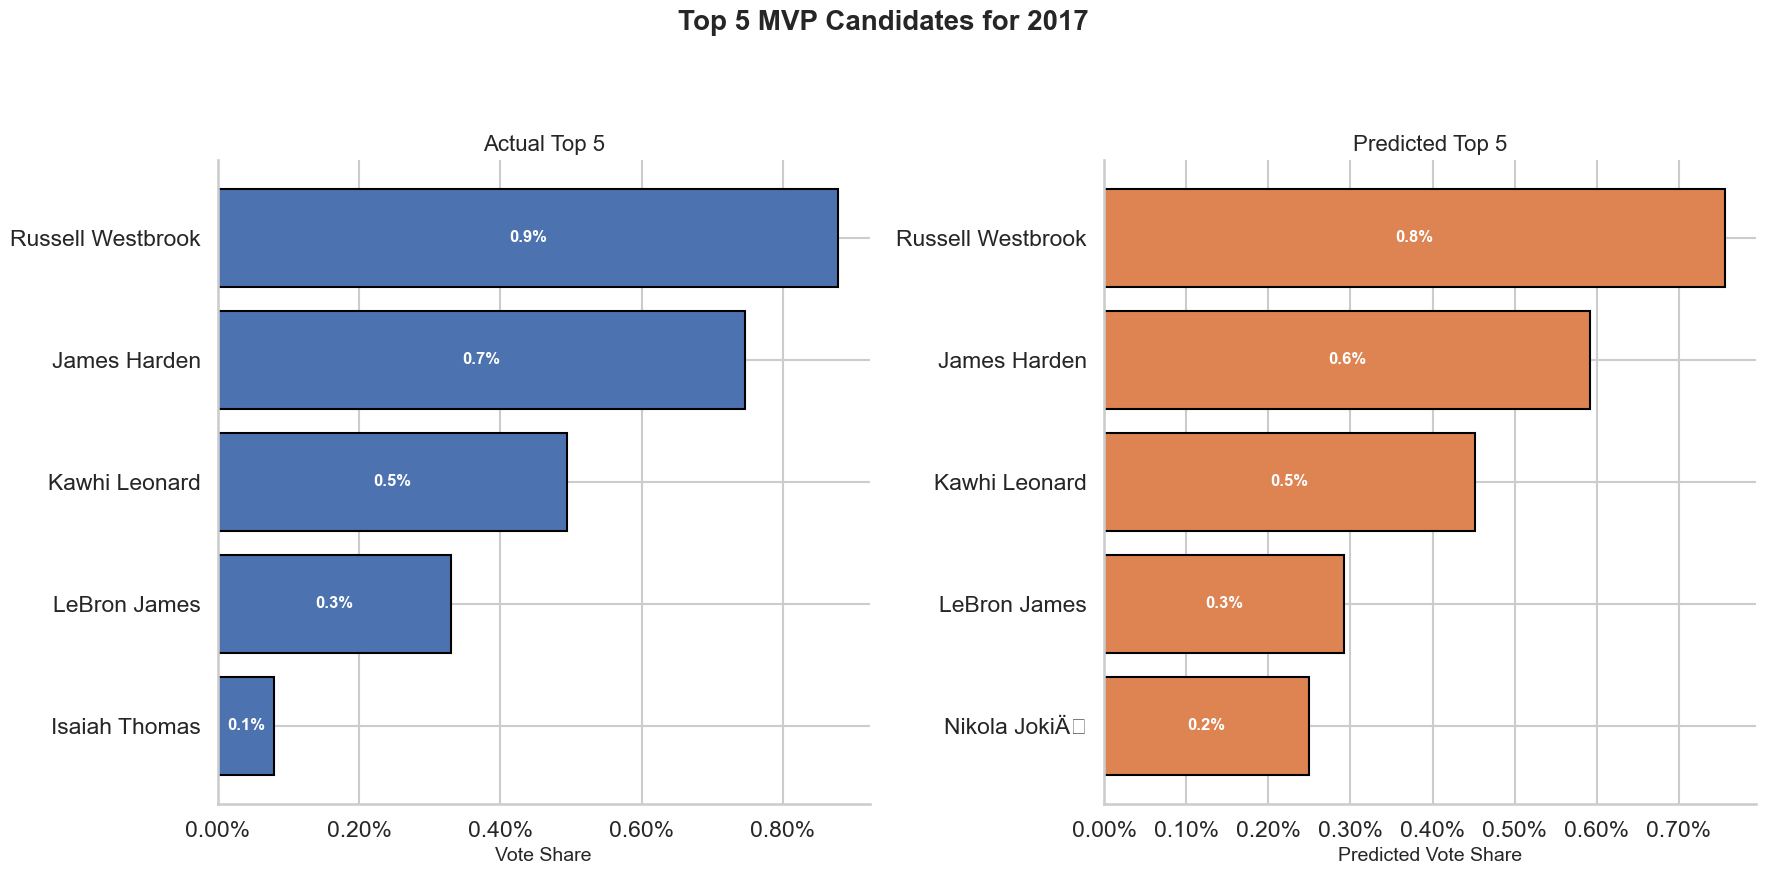

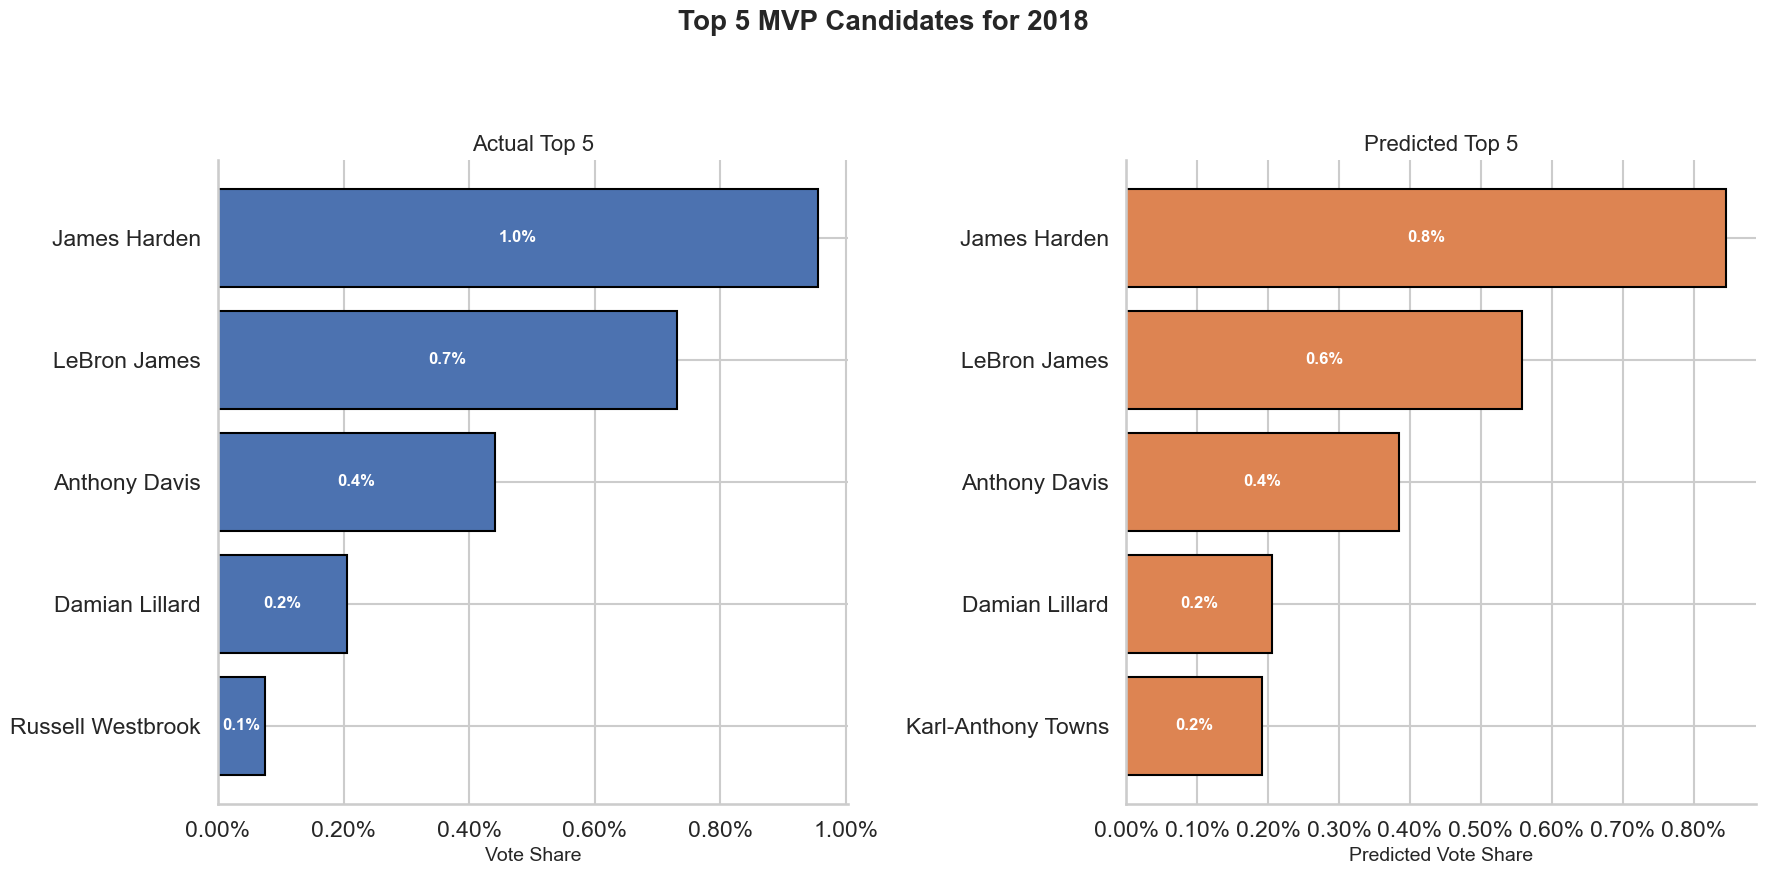

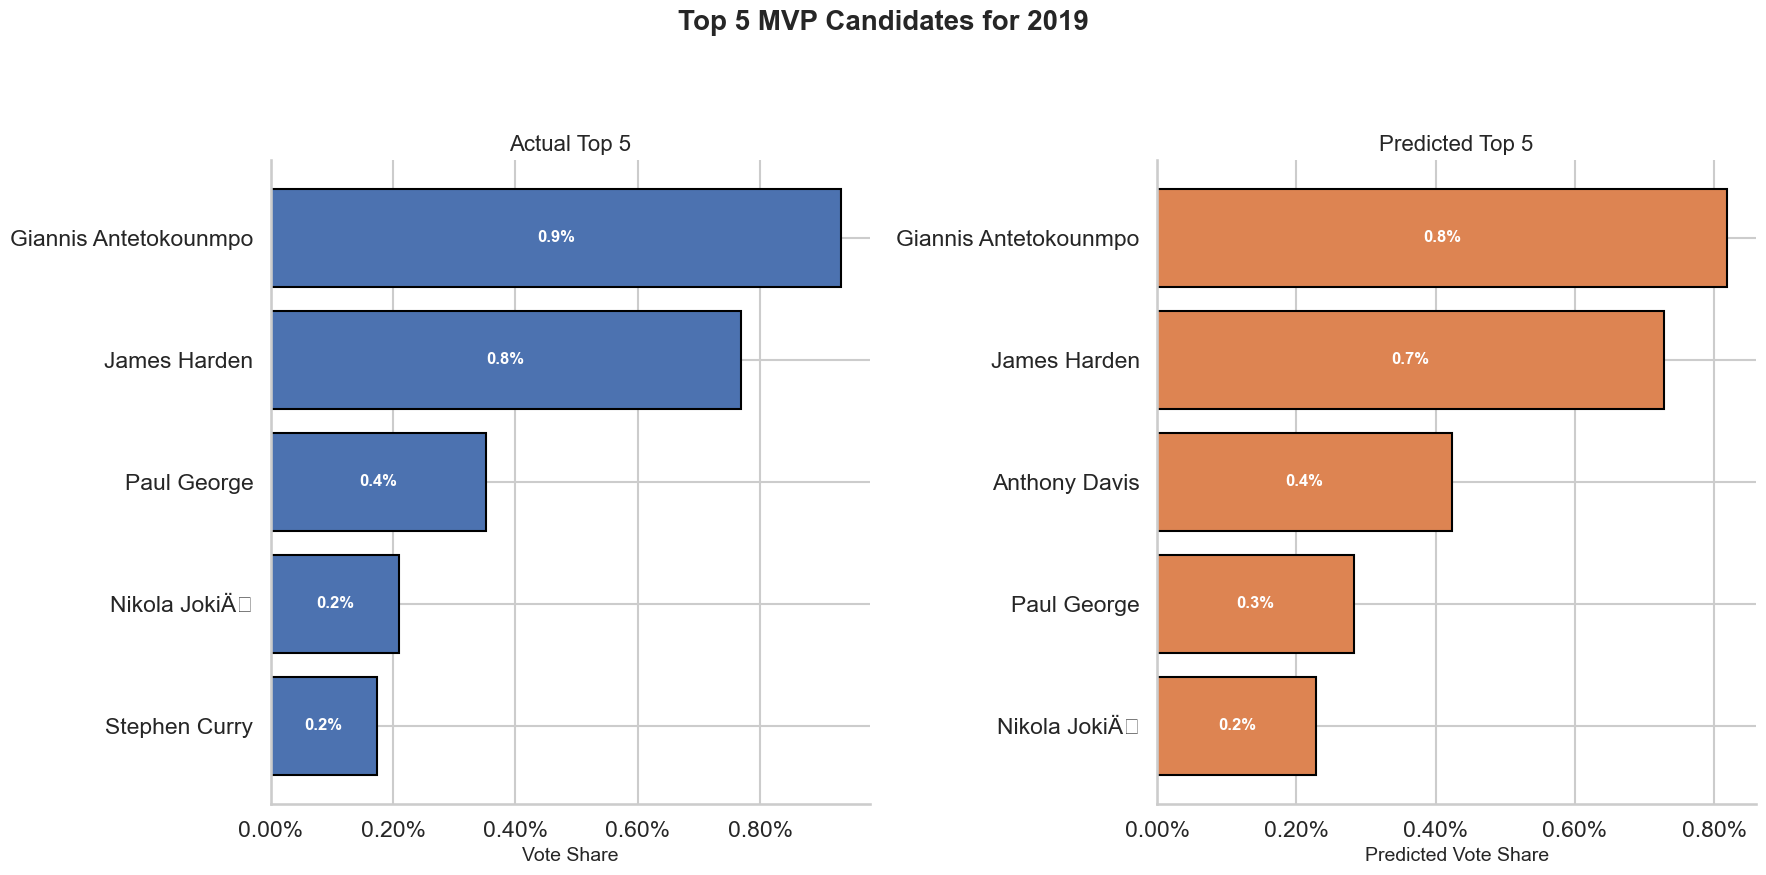

C:\Users\antho\AppData\Local\Temp\ipykernel_37416\1485752717.py:52: UserWarning: Glyph 141 (\x8d) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.93])


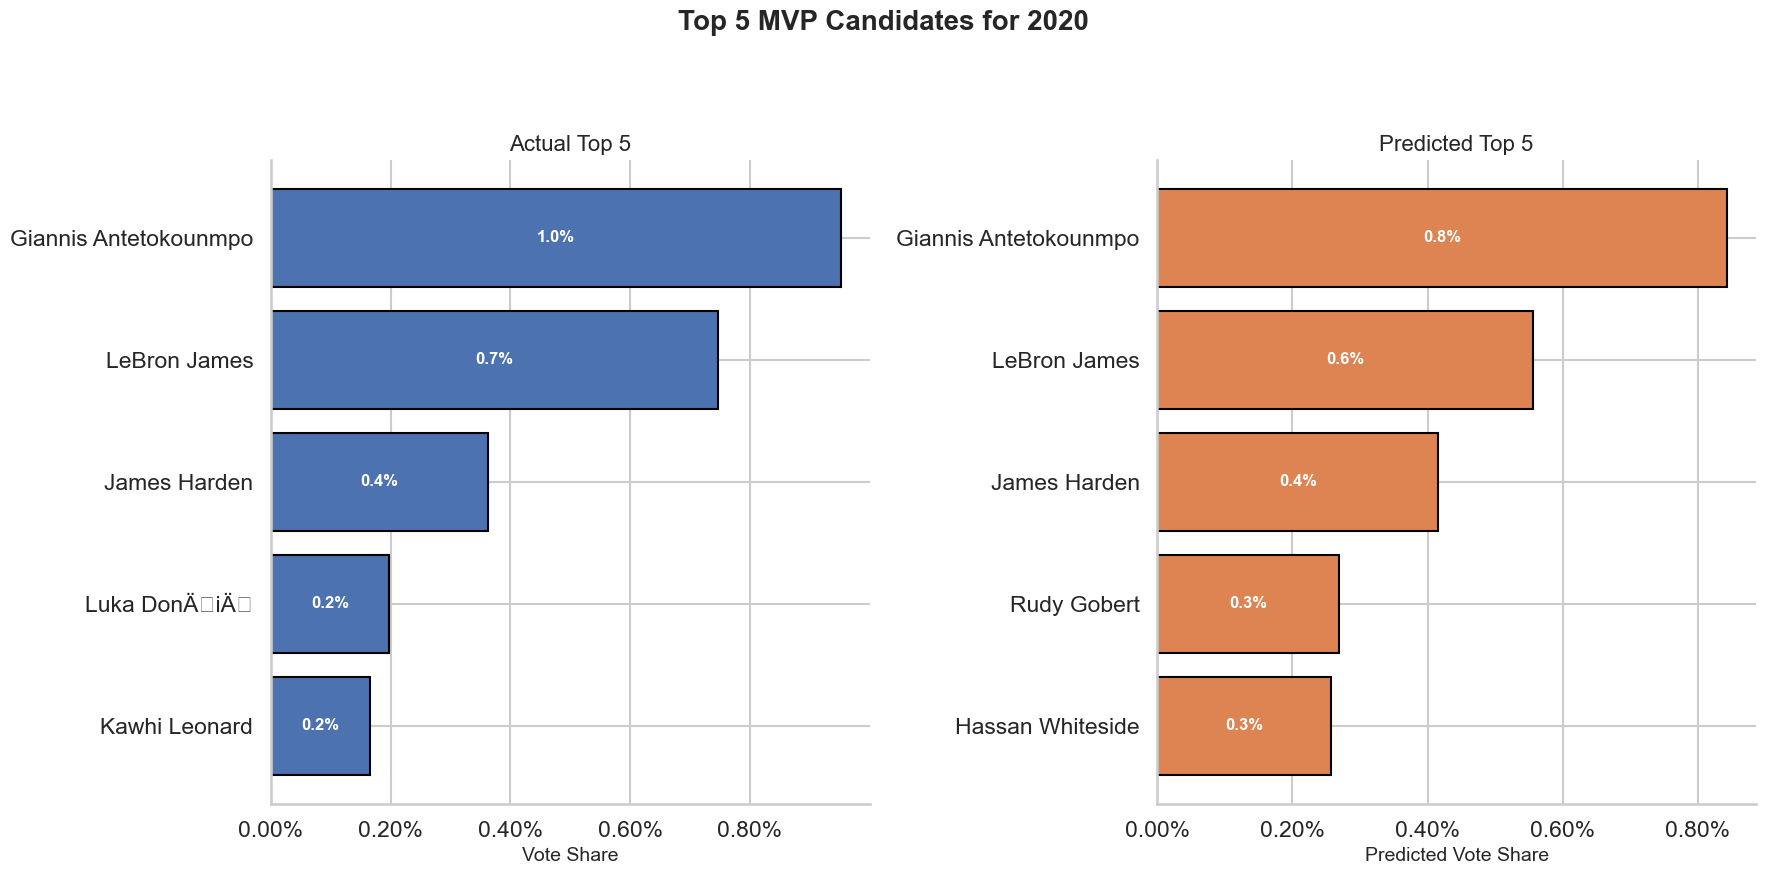

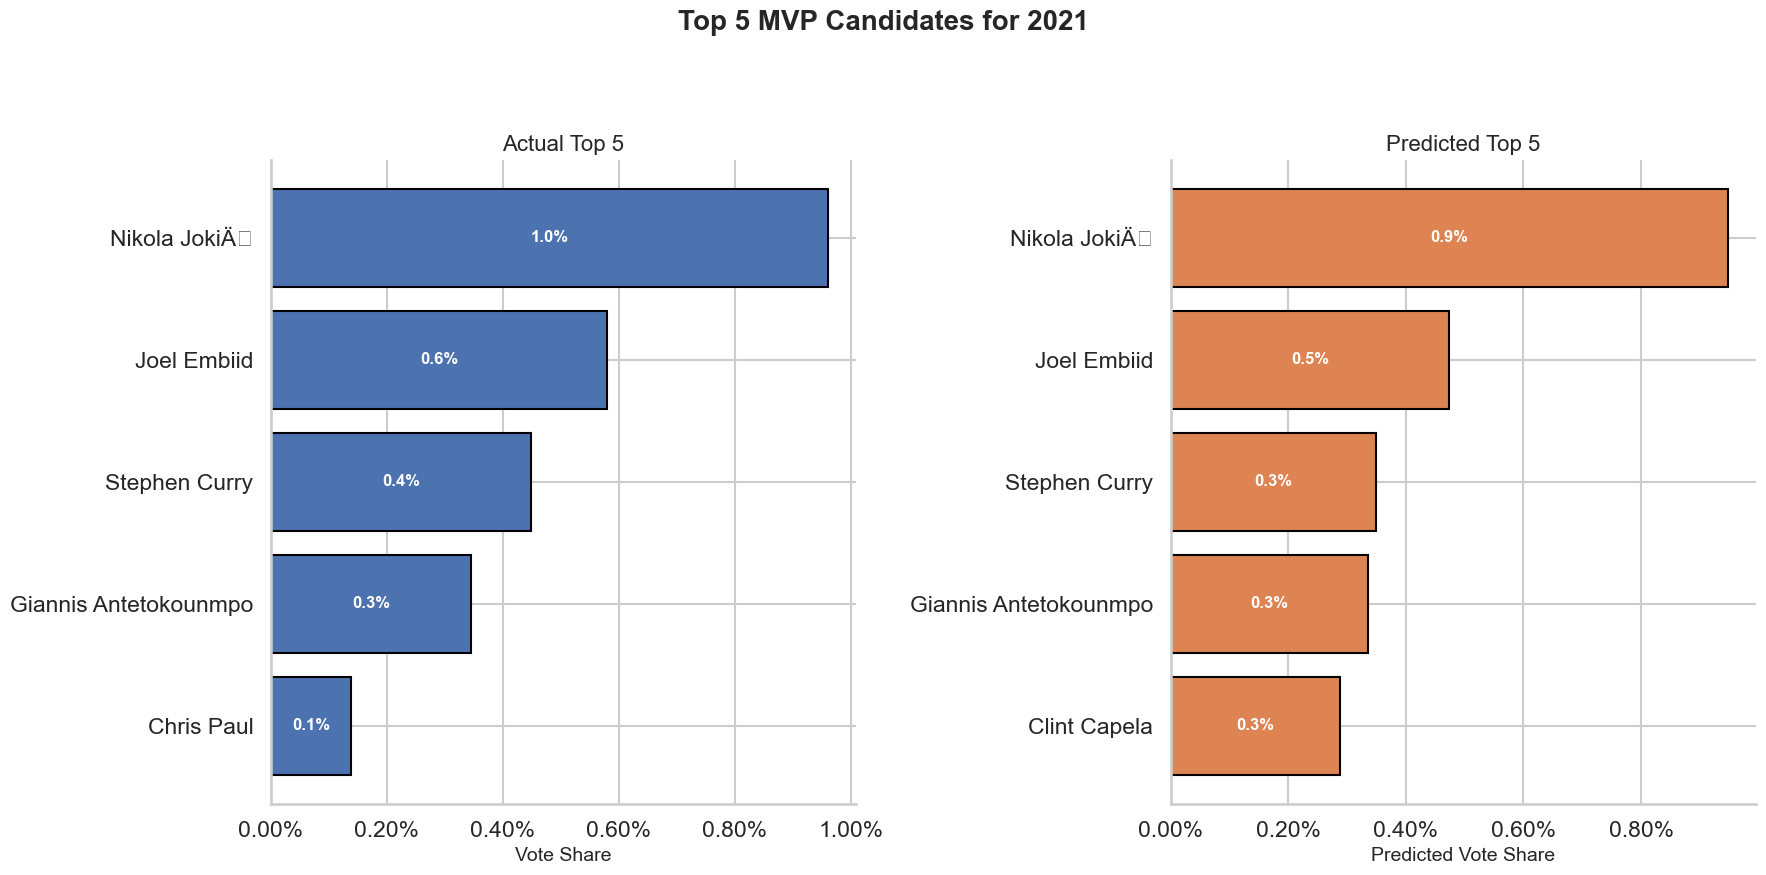

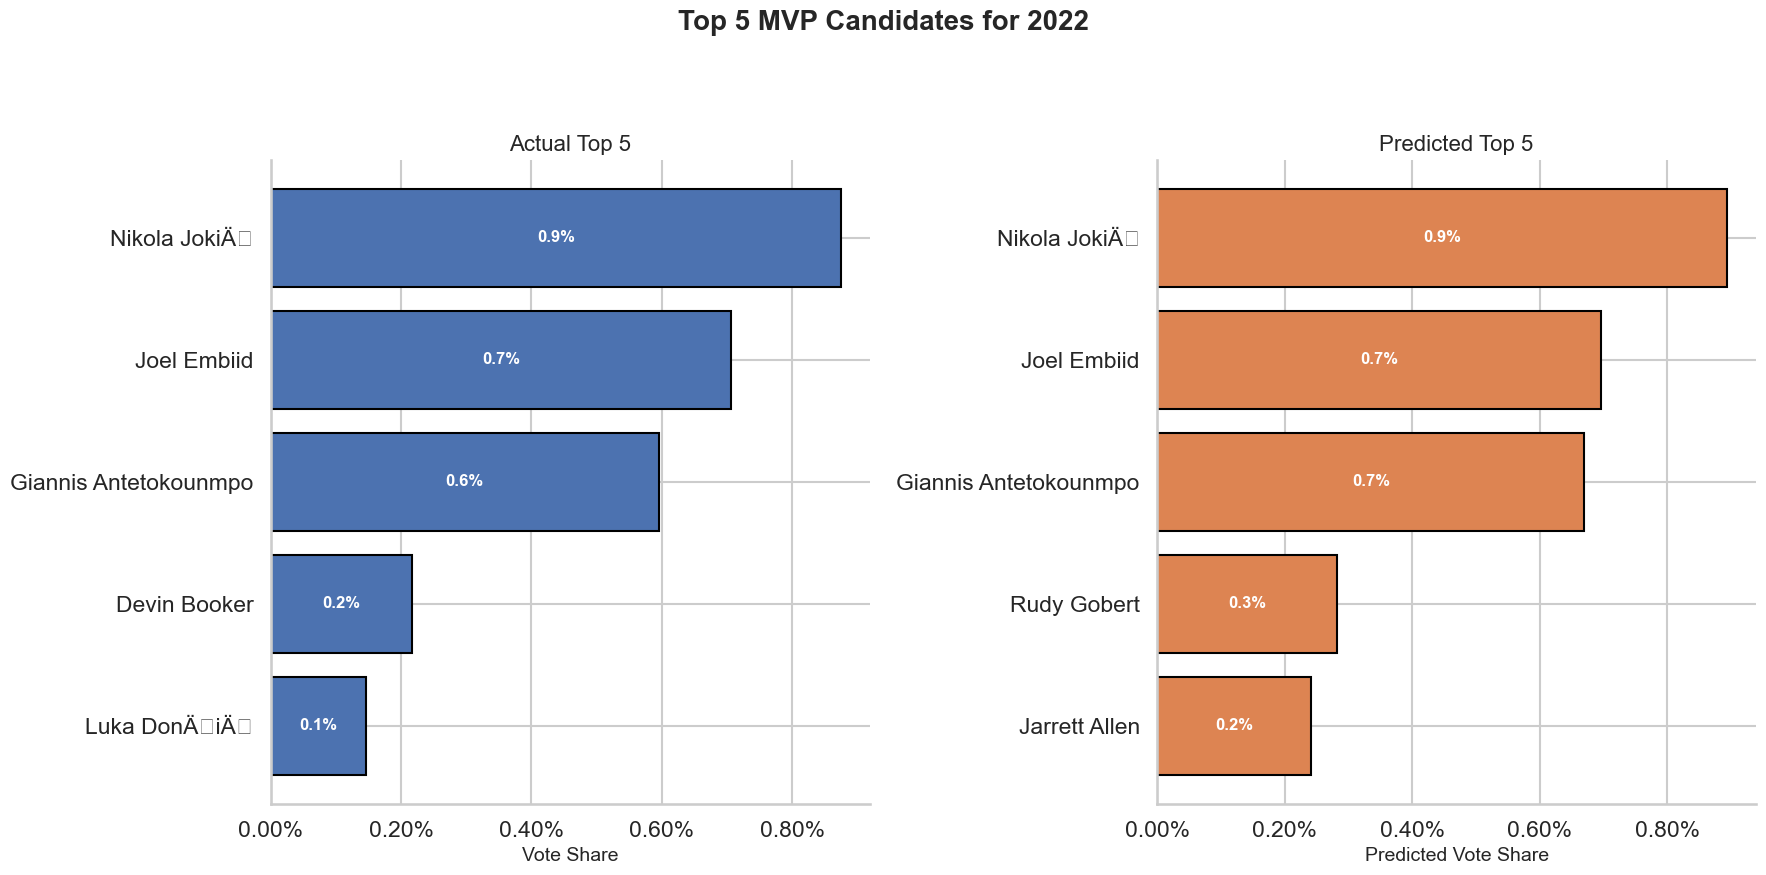

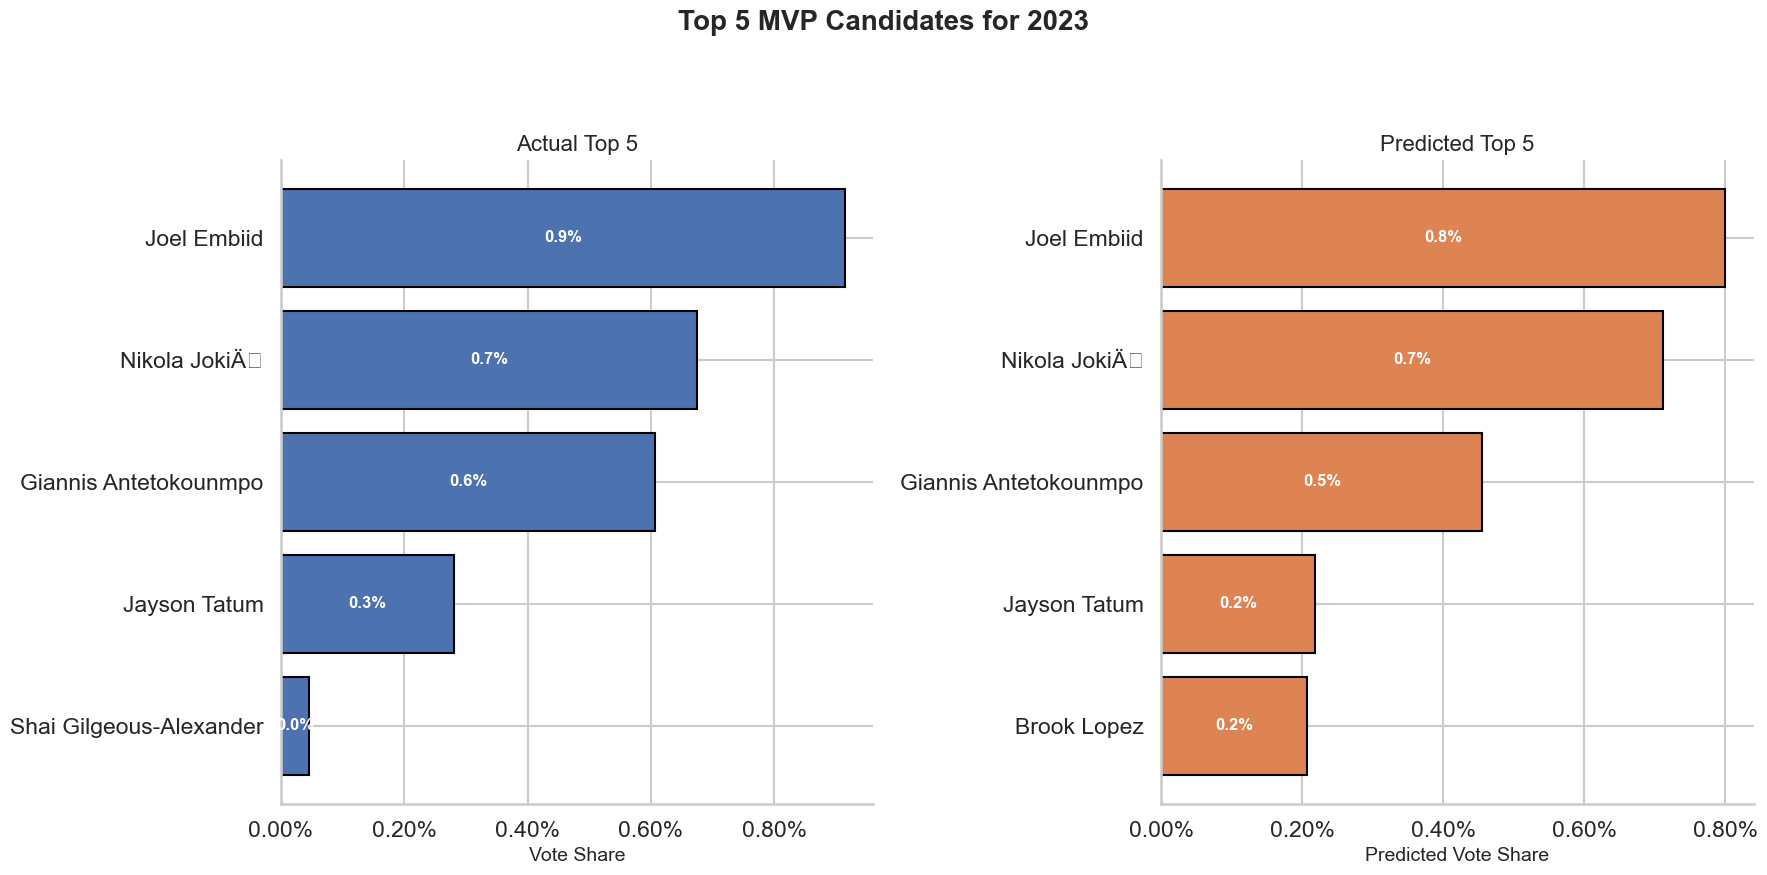

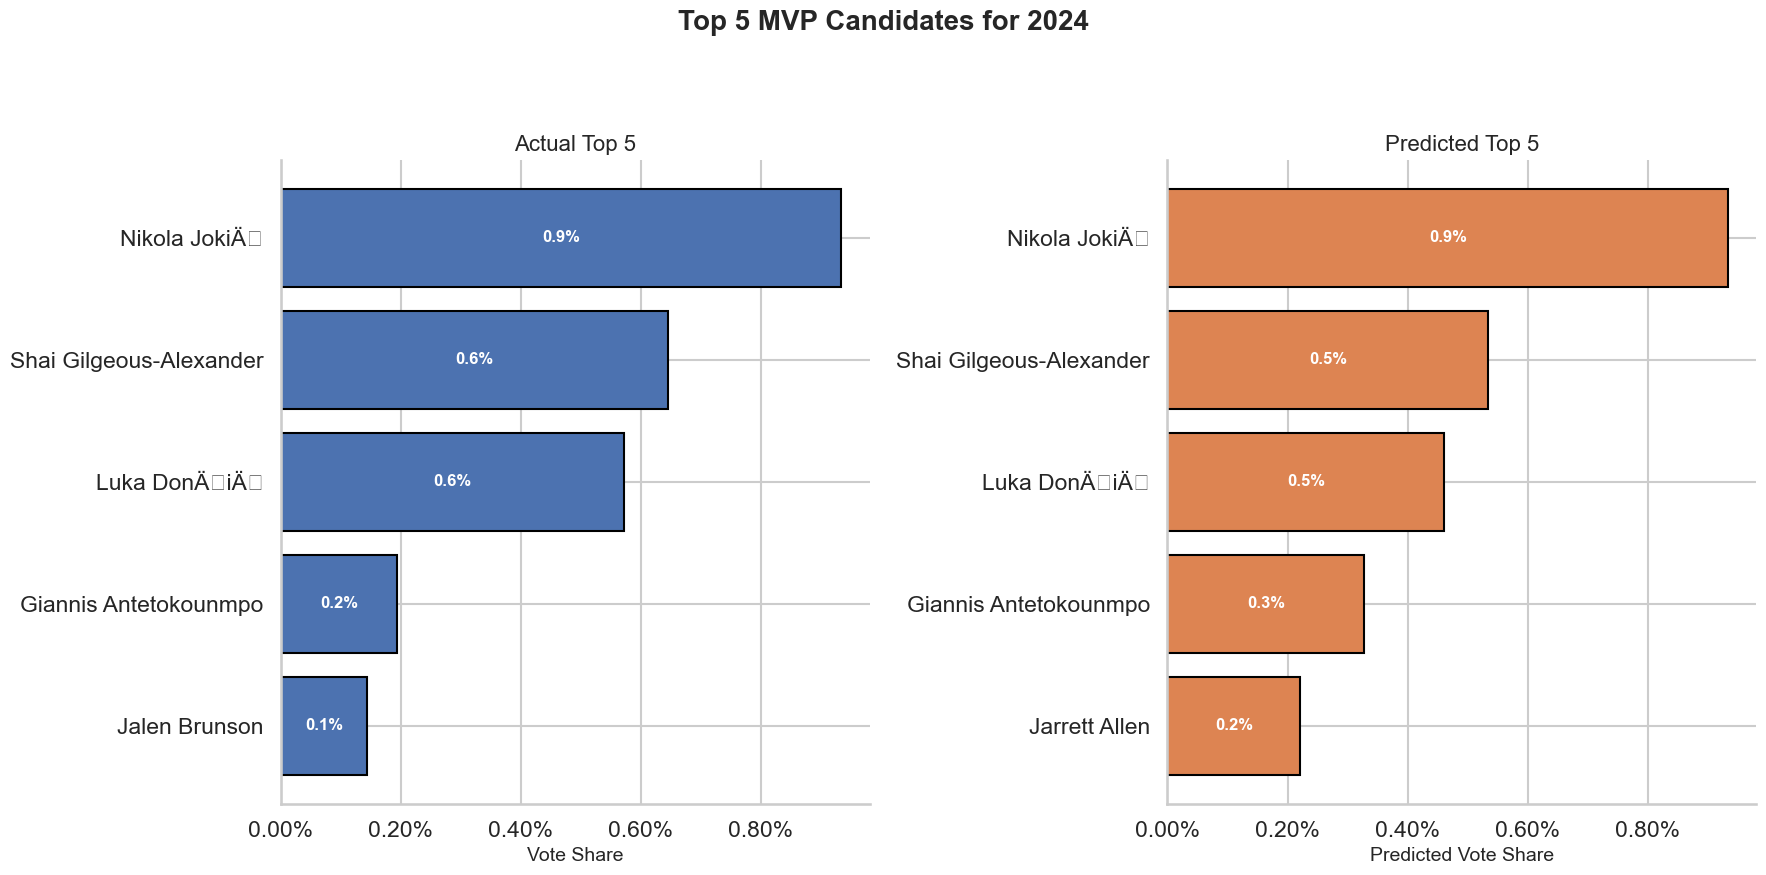

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Set a modern, clean style with larger context for presentations
sns.set_theme(style="whitegrid", context="talk")

# Define colors from seaborn's palette
actual_color = sns.color_palette("deep")[0]
pred_color = sns.color_palette("deep")[1]

for season, comparison in sorted(top_5_comparison.items()):
    actual = comparison['Actual Top 5']
    predicted = comparison['Predicted Top 5']
    
    # Create a larger figure with two subplots side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(18, 9))
    fig.suptitle(f"Top 5 MVP Candidates for {season}", fontsize=20, weight='bold')
    
    # --- Actual Top 5 Plot ---
    ax = axes[0]
    bars = ax.barh(actual['Player'], actual['Vote Share'], color=actual_color, edgecolor='black')
    ax.set_title("Actual Top 5", fontsize=16)
    ax.set_xlabel("Vote Share", fontsize=14)
    ax.invert_yaxis()  # Highest value on top
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Annotate each actual bar inside with the vote share value in white
    for bar in bars:
        width = bar.get_width()
        ax.text(width/2, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', va='center', ha='center', fontsize=12, fontweight='bold', color='white')
    
    # --- Predicted Top 5 Plot ---
    ax = axes[1]
    bars = ax.barh(predicted['Player'], predicted['Predicted Vote Share'], color=pred_color, edgecolor='black')
    ax.set_title("Predicted Top 5", fontsize=16)
    ax.set_xlabel("Predicted Vote Share", fontsize=14)
    ax.invert_yaxis()
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Annotate each predicted bar inside with the predicted vote share value in white
    for bar in bars:
        width = bar.get_width()
        ax.text(width/2, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', va='center', ha='center', fontsize=12, fontweight='bold', color='white')
    
    # Remove spines for a cleaner look
    sns.despine(fig=fig)
    
    # Adjust layout to ensure nothing overlaps
    plt.tight_layout(rect=[0, 0, 1, 0.93])
    plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a combined DataFrame with actual and predicted for each season and player
comparison_data = []
for season, comparison in sorted(top_5_comparison.items()):
    actual = comparison['Actual Top 5'].assign(Source='Actual')
    predicted = comparison['Predicted Top 5'].assign(Source='Predicted')
    combined = pd.concat([actual, predicted])
    combined['Season'] = season
    comparison_data.append(combined)

# Concatenate all season data
comparison_df = pd.concat(comparison_data)

# Pivot table to create a heatmap-friendly format
heatmap_data = comparison_df.pivot_table(index="Player", columns="Season", values="Vote Share", fill_value=0)

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Vote Share'})
plt.title("Vote Share for Top 5 Players by Season (Actual and Predicted)")
plt.ylabel("Player")
plt.xlabel("Season")
plt.show()

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

In [13]:
# Initialize counters
total_seasons = len(top_5_comparison)
correct_mvp_predictions = 0
correct_second_place_predictions = 0
correct_third_place_predictions = 0

# Iterate through each season to check predictions
for season, comparison in top_5_comparison.items():
    actual = comparison['Actual Top 5'].reset_index(drop=True)
    predicted = comparison['Predicted Top 5'].reset_index(drop=True)

    # Check if the top predicted player matches the actual MVP
    if actual['Player'][0] == predicted['Player'][0]:  # First place prediction
        correct_mvp_predictions += 1
    
    # Check 2nd and 3rd places
    if actual['Player'][1] == predicted['Player'][1]:  # Second place prediction
        correct_second_place_predictions += 1
    if actual['Player'][2] == predicted['Player'][2]:  # Third place prediction
        correct_third_place_predictions += 1

# Calculate percentages
mvp_accuracy_percent = (correct_mvp_predictions / total_seasons) * 100
second_place_accuracy_percent = (correct_second_place_predictions / total_seasons) * 100
third_place_accuracy_percent = (correct_third_place_predictions / total_seasons) * 100

# Display results
print(f"Percentage of correct MVP predictions: {mvp_accuracy_percent:.2f}%")
print(f"Percentage of correct 2nd place predictions: {second_place_accuracy_percent:.2f}%")
print(f"Percentage of correct 3rd place predictions: {third_place_accuracy_percent:.2f}%")


Percentage of correct MVP predictions: 100.00%
Percentage of correct 2nd place predictions: 85.71%
Percentage of correct 3rd place predictions: 61.90%
